<a href="https://colab.research.google.com/github/Ashraf-Saleh/Fault-Detect/blob/Master/Fault_Detect_28May23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.insert(0,'/content/drive/My Drive/Master/Code')
from FD_prepare_data import *

In [3]:
file_path_ideal = '/content/drive/My Drive/Colab_Data/Fault_Detect_2/train_data_ideal/*.csv'

data = wrangle(file_path_ideal)

In [4]:
#Prepare the data and split to the features and labes
X_data, y_data = reshape(data)

In [ ]:
#Prepare the data to CNN 2D model
Train_X = reshape_to_CNN_2D(X_data)
Train_Y = cat_label(y_data)

In [ ]:
# normalization 
Train_X = normalize(Train_X)

In [ ]:
import numpy as np
np.savez("/content/drive/My Drive/Colab_Data/Fault_Detect_paper/np_data/data_ideal_may23_paper.npz", x=Train_X, y=Train_Y)

In [3]:
import numpy as np
Train_X = np.load("/content/drive/My Drive/Colab_Data/Fault_Detect_paper/np_data/data_ideal_may23_paper.npz")["x"]
Train_Y = np.load("/content/drive/My Drive/Colab_Data/Fault_Detect_paper/np_data/data_ideal_may23_paper.npz")["y"]

In [4]:
import numpy 
Vald_X = numpy.load("/content/drive/Othercomputers/My Computer (2)/Master Workspace/Workspace 2/data_ind_99_clean_nor_vald.npz")["x"]
Vald_Y = numpy.load("/content/drive/Othercomputers/My Computer (2)/Master Workspace/Workspace 2/data_ind_99_clean_nor_vald.npz")["y"]

In [5]:
import matplotlib.pyplot as plt

def show_acc_los_total(train_acc_list, vald_acc_list, type_graph):
  plt.plot(list(train_acc_list.keys()),[row[1] for row in list(train_acc_list.values())])
  plt.plot(list(vald_acc_list.keys()),[row[1] for row in list(vald_acc_list.values())])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel(type_graph)
  plt.xticks(rotation = 45)
  plt.legend(['Train', 'Vald'], loc='upper left')
  plt.show()

  plt.plot(list(train_acc_list.keys()),[row[0] for row in list(train_acc_list.values())])
  plt.plot(list(vald_acc_list.keys()),[row[0] for row in list(vald_acc_list.values())])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel(type_graph)
  plt.xticks(rotation = 45)
  plt.legend(['Train', 'Vald'], loc='upper left')
  plt.show()

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

# tf.keras.utils.plot_model(model, to_file='model.png', show_shapes = True, show_layer_names = True)
def show_acc_los(history):
  plt.rcParams['figure.figsize']=[6,4]
  plt.rcParams['figure.dpi'] = 100

  print(history.history.keys())
  # Plot training & validation accuracy values
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Vald'], loc='upper left')
  plt.show()
  
  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Vald'], loc='upper left')
  plt.show()

#Ablation Study


1. Filter, Kernel, Stride
2. Pooling Type
3. Activiation
4. Optimizer
5. Batch size, epochs, Learning rate
6. Depth of CNN
7. Depth of Dense layer
8. CNN + LSTM
9. augmenation
10. segmenation 
11. duplicate (Lazy training)
12. CNN 1D + segmentation + Voting



##1- Filter, Kernel size, Stride
Filter  32, 64, 128  
Kernel size (2, 2), (3, 3), (4, 4)  
Stride (1, 1), (2, 2), (3, 3)  

The best result : F:64, K:(3, 3), S:(2, 2)



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 4, 4999, 32)       160       
                                                                 
 batch_normalization (BatchN  (None, 4, 4999, 32)      128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4999, 32)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 639872)            0         
                                                                 
 dense (Dense)               (None, 32)                204759

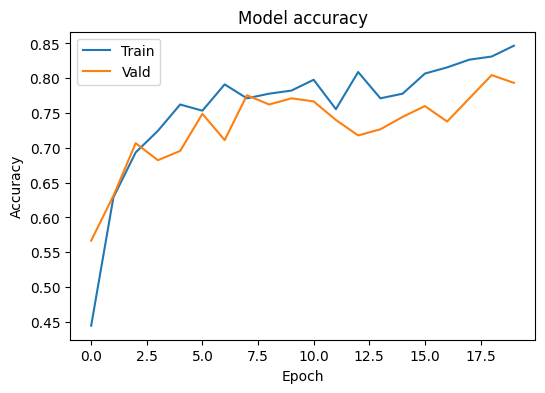

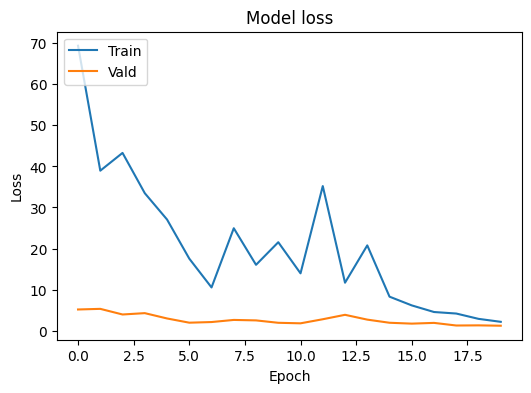

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2500, 32)       160       
                                                                 
 batch_normalization_1 (Batc  (None, 2, 2500, 32)      128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2500, 32)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 160000)            0         
                                                                 
 dense_2 (Dense)             (None, 32)                512003

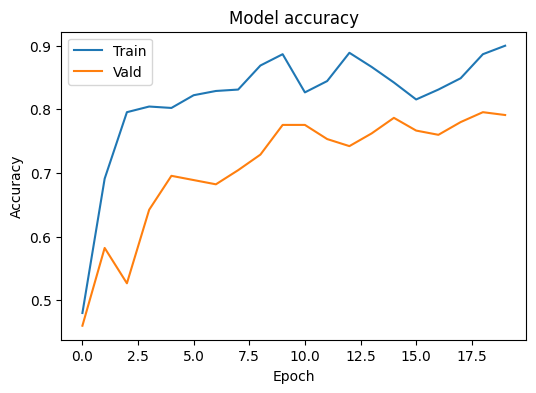

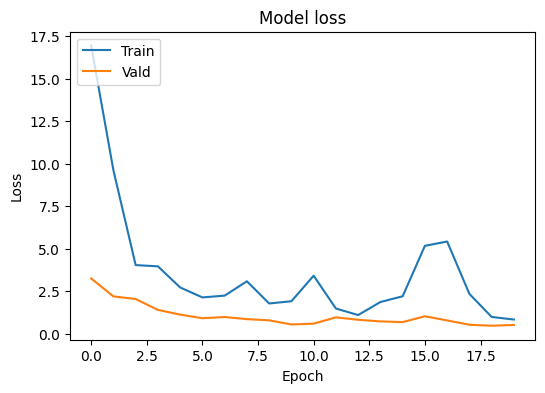

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 4998, 32)       320       
                                                                 
 batch_normalization_2 (Batc  (None, 3, 4998, 32)      128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 4998, 32)      0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 479808)            0         
                                                                 
 dense_4 (Dense)             (None, 32)                153538

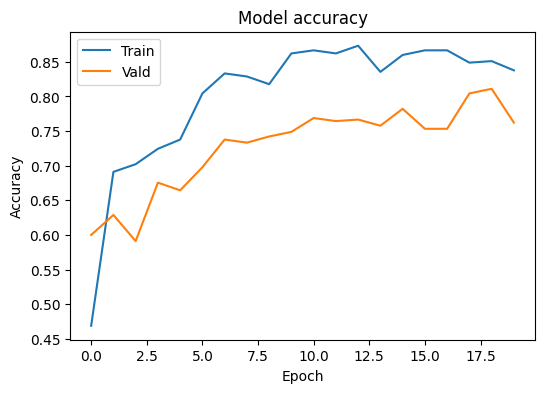

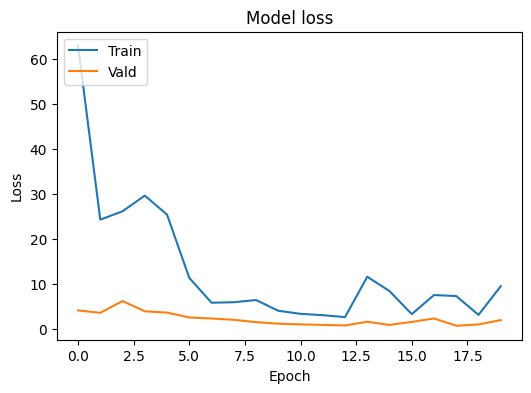

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2499, 32)       320       
                                                                 
 batch_normalization_3 (Batc  (None, 2, 2499, 32)      128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 2499, 32)      0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 159936)            0         
                                                                 
 dense_6 (Dense)             (None, 32)                511798

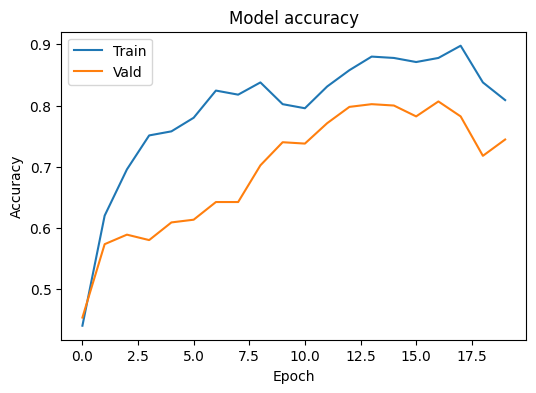

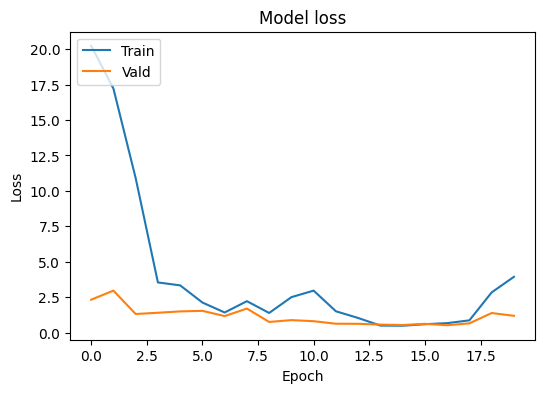

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4999, 64)       320       
                                                                 
 batch_normalization_4 (Batc  (None, 4, 4999, 64)      256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 4, 4999, 64)      0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1279744)           0         
                                                                 
 dense_8 (Dense)             (None, 32)                409518

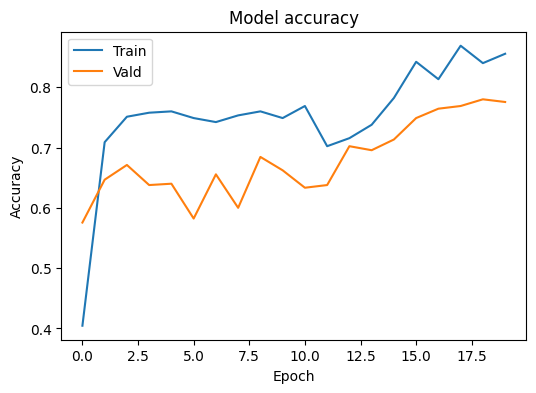

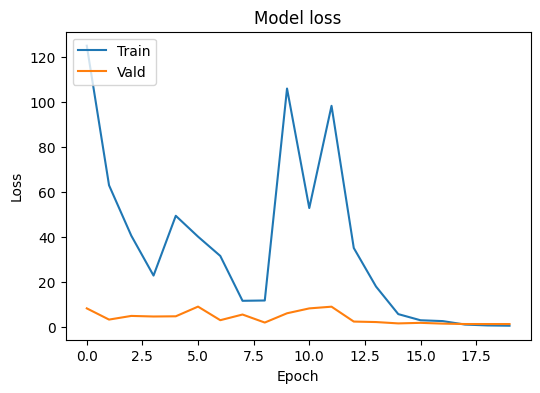

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 2, 2500, 64)       320       
                                                                 
 batch_normalization_5 (Batc  (None, 2, 2500, 64)      256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2500, 64)      0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 320000)            0         
                                                                 
 dense_10 (Dense)            (None, 32)                102400

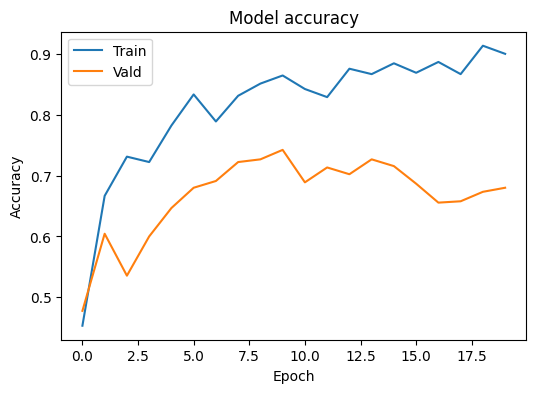

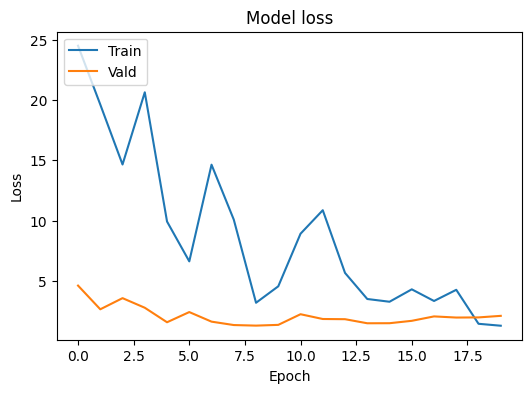

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 4998, 64)       640       
                                                                 
 batch_normalization_6 (Batc  (None, 3, 4998, 64)      256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 3, 4998, 64)      0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 959616)            0         
                                                                 
 dense_12 (Dense)            (None, 32)                307077

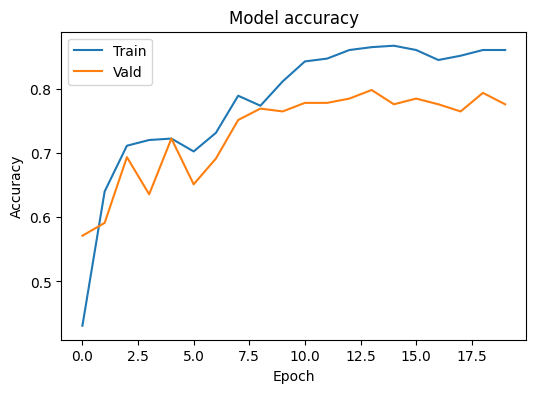

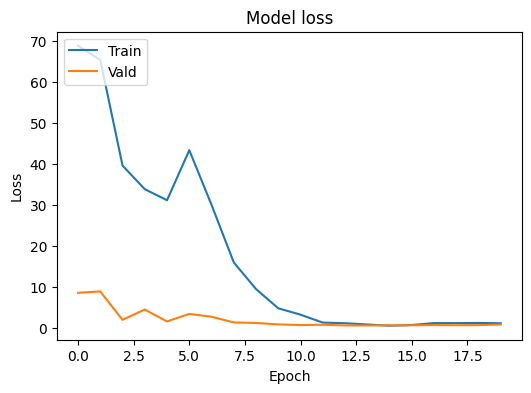

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_7 (Batc  (None, 2, 2499, 64)      256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 2, 2499, 64)      0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 319872)            0         
                                                                 
 dense_14 (Dense)            (None, 32)                102359

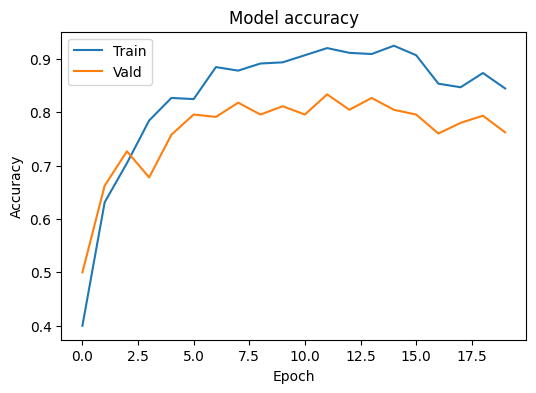

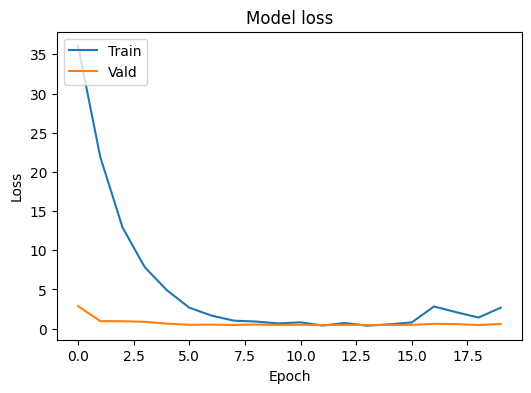

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4999, 128)      640       
                                                                 
 batch_normalization_8 (Batc  (None, 4, 4999, 128)     512       
 hNormalization)                                                 
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 4, 4999, 128)     0         
 2D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 2559488)           0         
                                                                 
 dense_16 (Dense)            (None, 32)                819036

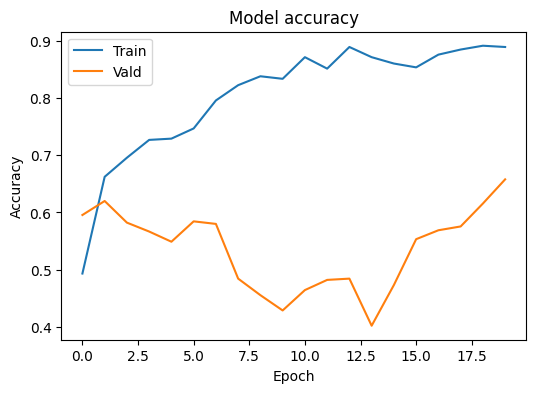

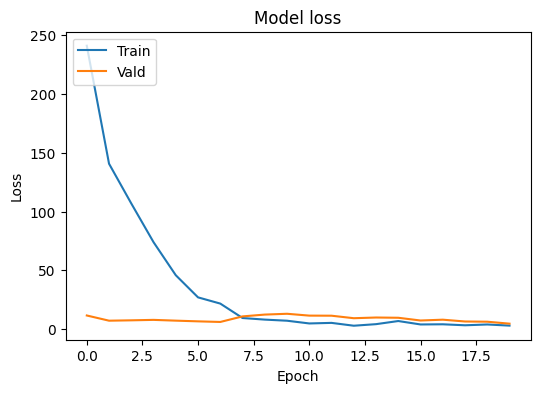

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 2, 2500, 128)      640       
                                                                 
 batch_normalization_9 (Batc  (None, 2, 2500, 128)     512       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 2, 2500, 128)     0         
 2D)                                                             
                                                                 
 flatten_9 (Flatten)         (None, 640000)            0         
                                                                 
 dense_18 (Dense)            (None, 32)                204800

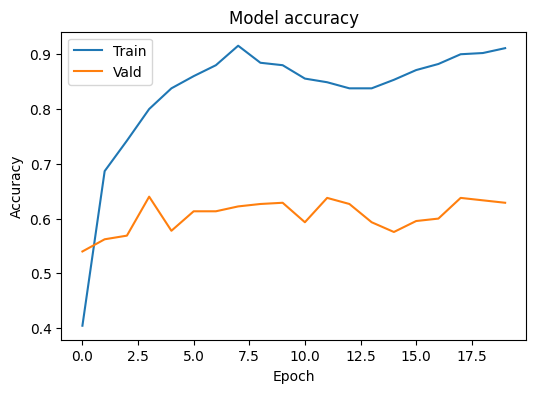

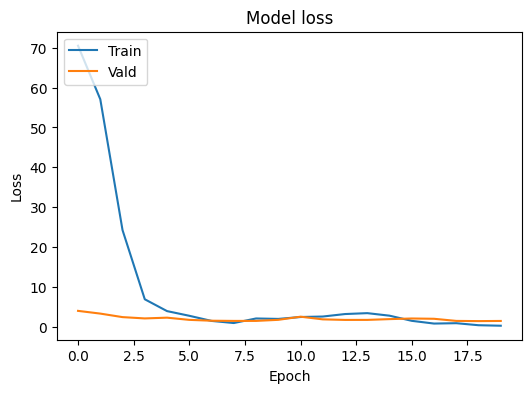

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 3, 4998, 128)      1280      
                                                                 
 batch_normalization_10 (Bat  (None, 3, 4998, 128)     512       
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 3, 4998, 128)     0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 1919232)           0         
                                                                 
 dense_20 (Dense)            (None, 32)                614154

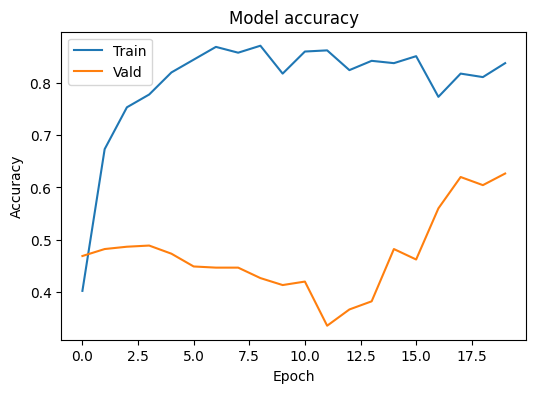

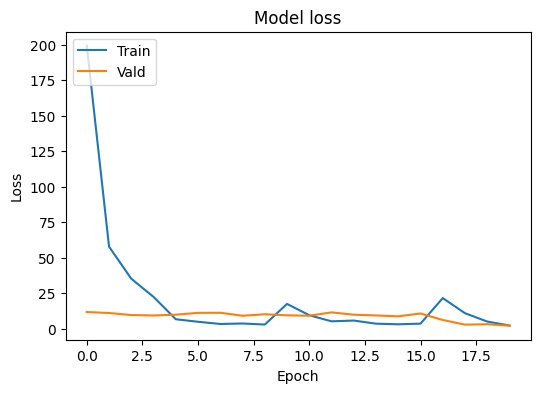

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_11 (Conv2D)          (None, 2, 2499, 128)      1280      
                                                                 
 batch_normalization_11 (Bat  (None, 2, 2499, 128)     512       
 chNormalization)                                                
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 2, 2499, 128)     0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 639744)            0         
                                                                 
 dense_22 (Dense)            (None, 32)                204718

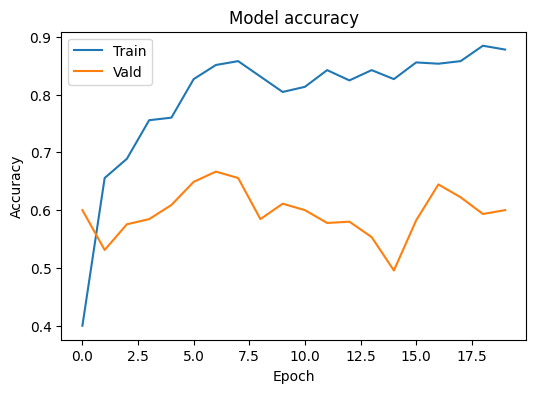

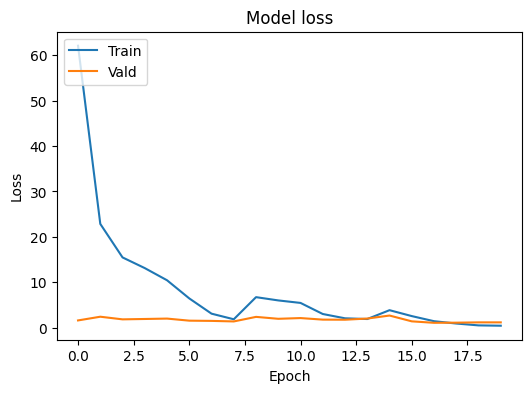

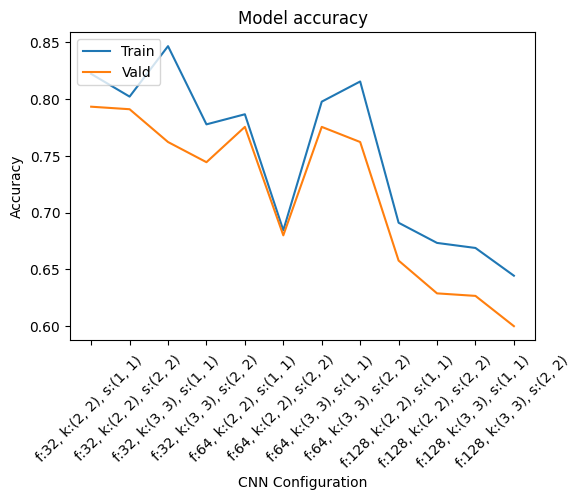

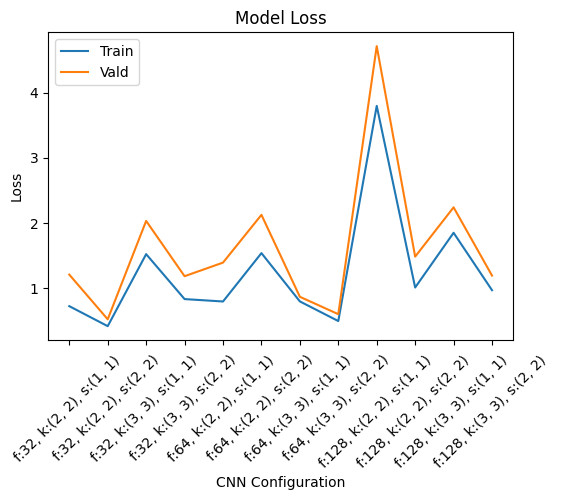

f:32, k:(2, 2), s:(1, 1)   f:32, k:(2, 2), s:(2, 2)   \
Filter, Kernel, Stride                                                         
Loss                                     0.720640                   0.413494   
Accuracy                                 0.822222                   0.802222   

                        f:32, k:(3, 3), s:(1, 1)   f:32, k:(3, 3), s:(2, 2)   \
Filter, Kernel, Stride                                                         
Loss                                     1.520059                   0.829448   
Accuracy                                 0.846667                   0.777778   

                        f:64, k:(2, 2), s:(1, 1)   f:64, k:(2, 2), s:(2, 2)   \
Filter, Kernel, Stride                                                         
Loss                                     0.792535                   1.535761   
Accuracy                                 0.786667                   0.684444   

                        f:64, k:(3, 3), s:(1, 1)   f:64, k:(3, 3), s:(2, 2)   \
Filter, Kernel, Stride                                                         
Loss                                     0.793647                   0.491952   
Accuracy                                 0.797778                   0.815556   

                        f:128, k:(2, 2), s:(1, 1)   \
Filter, Kernel, Stride                               
Loss                                      3.797968   
Accuracy                                  0.691111   

                        f:128, k:(2, 2), s:(2, 2)   \
Filter, Kernel, Stride                               
Loss                                      1.007419   
Accuracy                                  0.673333   

                        f:128, k:(3, 3), s:(1, 1)   f:128, k:(3, 3), s:(2, 2)   
Filter, Kernel, Stride                                                          
Loss                                      1.848077                    0.965965  
Accuracy                                  0.668889                    0.644444

f:32, k:(2, 2), s:(1, 1)   f:32, k:(2, 2), s:(2, 2)   \
Filter, Kernel, Stride                                                         
Loss                                     1.205253                   0.519007   
Accuracy                                 0.793333                   0.791111   

                        f:32, k:(3, 3), s:(1, 1)   f:32, k:(3, 3), s:(2, 2)   \
Filter, Kernel, Stride                                                         
Loss                                     2.030246                   1.180931   
Accuracy                                 0.762222                   0.744444   

                        f:64, k:(2, 2), s:(1, 1)   f:64, k:(2, 2), s:(2, 2)   \
Filter, Kernel, Stride                                                         
Loss                                     1.389927                     2.1237   
Accuracy                                 0.775556                     0.6800   

                        f:64, k:(3, 3), s:(1, 1)   f:64, k:(3, 3), s:(2, 2)   \
Filter, Kernel, Stride                                                         
Loss                                     0.864555                   0.597609   
Accuracy                                 0.775556                   0.762222   

                        f:128, k:(2, 2), s:(1, 1)   \
Filter, Kernel, Stride                               
Loss                                      4.715445   
Accuracy                                  0.657778   

                        f:128, k:(2, 2), s:(2, 2)   \
Filter, Kernel, Stride                               
Loss                                      1.481742   
Accuracy                                  0.628889   

                        f:128, k:(3, 3), s:(1, 1)   f:128, k:(3, 3), s:(2, 2)   
Filter, Kernel, Stride                                                          
Loss                                      2.238781                    1.190462  
Accuracy                                  0.626667                    0.600000

In [9]:
import keras
from keras import layers



filters_list = [32, 64, 128]
kernel_size_list = [(2,2), (3,3)]
strides_list = [(1,1), (2,2)]


train_acc_list = {}
vald_acc_list = {}


for f in filters_list:
  for k in kernel_size_list:
    for s in strides_list:
    
      inputs = keras.Input(shape = (Train_X.shape[1], Train_X.shape[2], Train_X.shape[3]))
      
      x = layers.Conv2D(filters = f, kernel_size = k,strides=s, activation = "relu") (inputs)
      x = layers.BatchNormalization()(x)
      x = layers.MaxPooling2D(pool_size = (1,1)) (x)
    
      x = layers.Flatten()(x)
      # for c in range(m): 
      x = layers.Dense(32, activation="relu")(x) 

      outputs = layers.Dense(Train_Y.shape[1], activation='softmax')(x)
      model = keras.Model(inputs, outputs, name="model") 
      model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy']) 
      model.summary()

      
      history = model.fit(Train_X, Train_Y, epochs=20,batch_size = 64, verbose=2, validation_data=(Vald_X, Vald_Y))

      print ('Training   ', model.metrics_names,' = ',model.evaluate(Train_X, Train_Y, verbose=0))
      print ('Validation ', model.metrics_names,' = ',model.evaluate(Vald_X, Vald_Y, verbose=0))


      train_acc_list["f:{}, k:{}, s:{} ".format(f, k, s)] = model.evaluate(Train_X, Train_Y, verbose=0)
      vald_acc_list["f:{}, k:{}, s:{} ".format(f, k, s)] = model.evaluate(Vald_X, Vald_Y, verbose=0)

      show_acc_los(history)
          

import pandas as pd
from IPython.display import display
df_train = pd.DataFrame(train_acc_list)
df_train['Filter, Kernel, Stride'] = ['Loss', 'Accuracy']
df_train.set_index('Filter, Kernel, Stride', inplace=True)
df_vald = pd.DataFrame(vald_acc_list)
df_vald['Filter, Kernel, Stride'] = ['Loss', 'Accuracy']
df_vald.set_index('Filter, Kernel, Stride', inplace=True)

show_acc_los_total(train_acc_list, vald_acc_list, "CNN Configuration")
display(df_train)
display(df_vald)

##2- Pooling Type and size


1. MaxPooling
2. AveragePooling
3. GlobalMaxPooling
4. GlobalAvergePooling

The best result with MaxPooling




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_12 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_12 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 319872)            0         
                                                                 
 dense_24 (Dense)            (None, 32)                102359

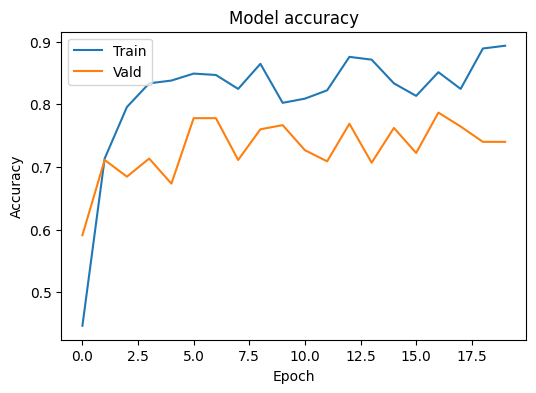

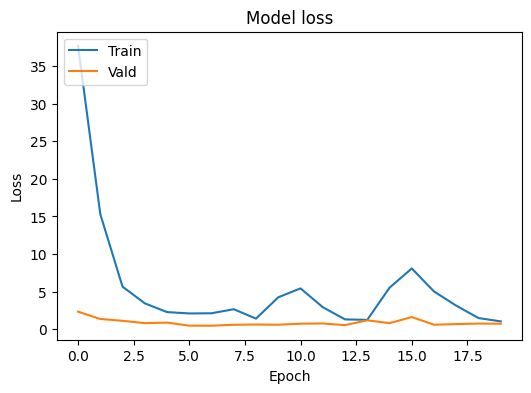

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_13 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 average_pooling2d (AverageP  (None, 2, 2499, 64)      0         
 ooling2D)                                                       
                                                                 
 flatten_13 (Flatten)        (None, 319872)            0         
                                                                 
 dense_26 (Dense)            (None, 32)                102359

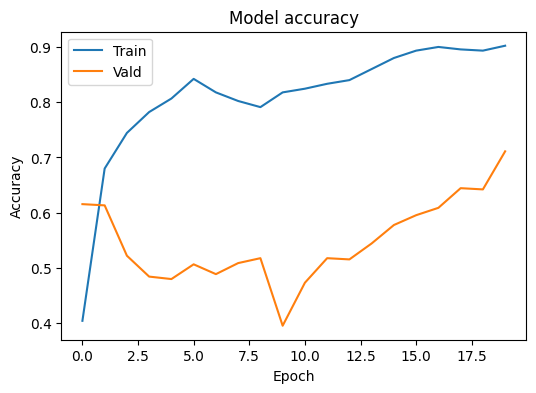

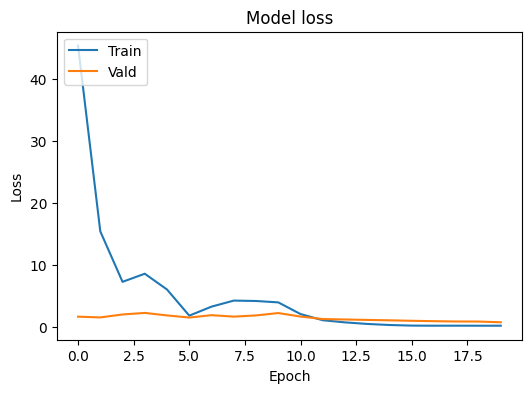

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_14 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_14 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 global_max_pooling2d (Globa  (None, 64)               0         
 lMaxPooling2D)                                                  
                                                                 
 flatten_14 (Flatten)        (None, 64)                0         
                                                                 
 dense_28 (Dense)            (None, 32)                2080  

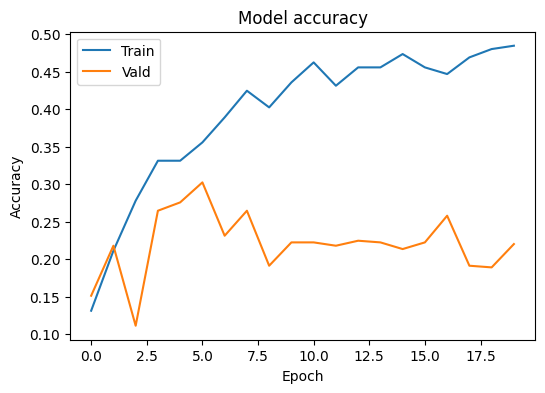

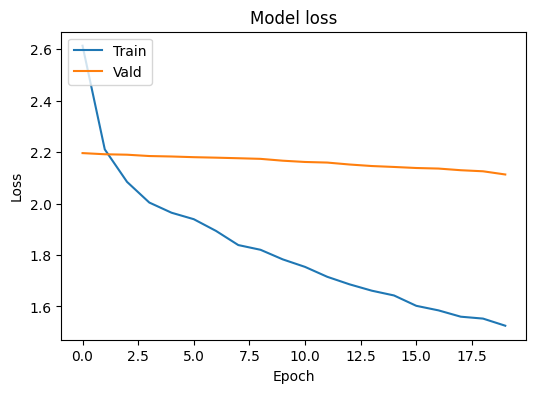

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_15 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_15 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 global_average_pooling2d (G  (None, 64)               0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten_15 (Flatten)        (None, 64)                0         
                                                                 
 dense_30 (Dense)            (None, 32)                2080  

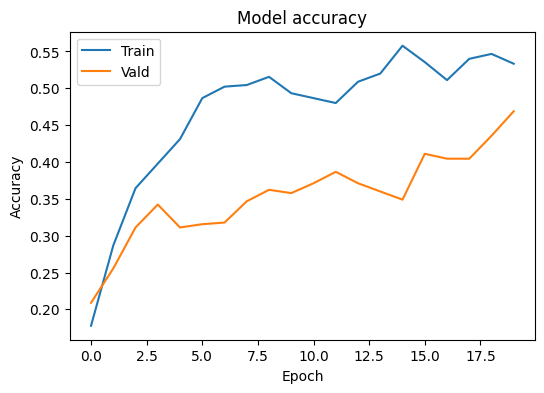

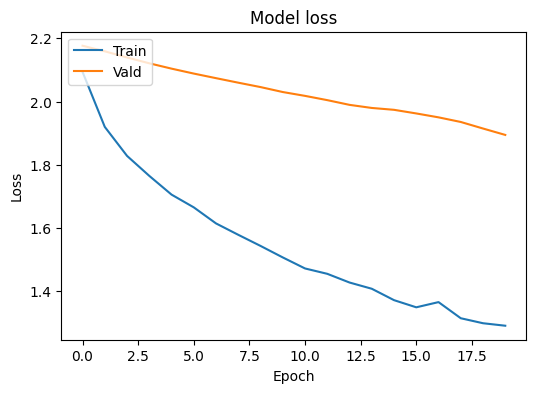

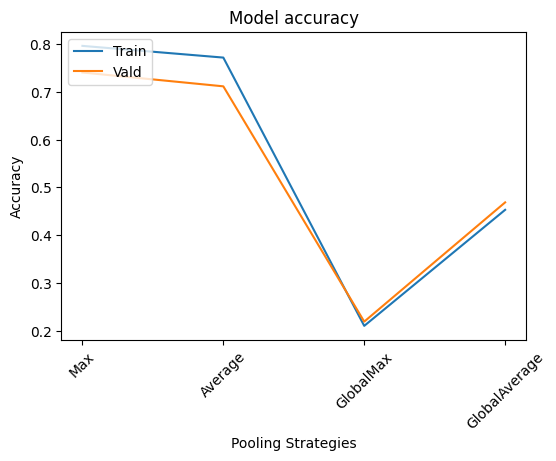

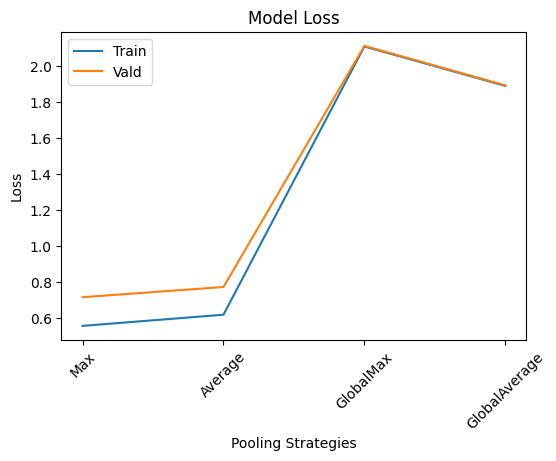

Max   Average  GlobalMax  GlobalAverage
pooling_strategies                                              
Loss                0.558701  0.620620   2.110148       1.891190
Accuracy            0.795556  0.771111   0.211111       0.453333

Max   Average  GlobalMax  GlobalAverage
pooling_strategies                                              
Loss                0.717888  0.774558   2.113445       1.894267
Accuracy            0.740000  0.711111   0.220000       0.468889

In [10]:
import keras
from keras import layers

# Define the pooling strategies to try
pooling_strategies = ['Max', 'Average', 'GlobalMax', 'GlobalAverage']



train_acc_list = {}
vald_acc_list = {}




for pool in pooling_strategies:
  inputs = keras.Input(shape = (Train_X.shape[1], Train_X.shape[2], Train_X.shape[3]))

  x = layers.Conv2D(filters = 64, kernel_size = (3, 3),strides=(2, 2), activation = "relu") (inputs)
  x = layers.BatchNormalization()(x)

  if pool == 'Max':
      x = layers.MaxPooling2D(pool_size=(1, 1))(x)
  elif pool == 'Average':
      x = layers.AveragePooling2D(pool_size=(1, 1))(x)
  elif pool == 'GlobalMax':
      x = layers.GlobalMaxPooling2D()(x)
  elif pool == 'GlobalAverage':
      x = layers.GlobalAveragePooling2D()(x)
  

  

  x = layers.Flatten()(x)
  # for c in range(m): 
  x = layers.Dense(32, activation="relu")(x) 

  outputs = layers.Dense(Train_Y.shape[1], activation='softmax')(x)
  model = keras.Model(inputs, outputs, name="model") 
  model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy']) 
  model.summary()


  history = model.fit(Train_X, Train_Y, epochs=20,batch_size = 64, verbose=2, validation_data=(Vald_X, Vald_Y))

  print ('Training   ', model.metrics_names,' = ',model.evaluate(Train_X, Train_Y, verbose=0))
  print ('Validation ', model.metrics_names,' = ',model.evaluate(Vald_X, Vald_Y, verbose=0))


  train_acc_list[pool] = model.evaluate(Train_X, Train_Y, verbose=0)
  vald_acc_list[pool] = model.evaluate(Vald_X, Vald_Y, verbose=0)

  show_acc_los(history)
          

import pandas as pd
from IPython.display import display
df_train_pool = pd.DataFrame(train_acc_list)
df_train_pool['pooling_strategies'] = ['Loss', 'Accuracy']
df_train_pool.set_index('pooling_strategies', inplace=True)
df_vald_pool = pd.DataFrame(vald_acc_list)
df_vald_pool['pooling_strategies'] = ['Loss', 'Accuracy']
df_vald_pool.set_index('pooling_strategies', inplace=True)

show_acc_los_total(train_acc_list, vald_acc_list, "Pooling Strategies")
display(df_train_pool)
display(df_vald_pool)

##3- Activation Type



1. Relu
2. Sigmoid
3. Tanh
4. softmax
5. elu  

The best is relu



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_20 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_20 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_20 (Flatten)        (None, 319872)            0         
                                                                 
 dense_40 (Dense)            (None, 32)                102359

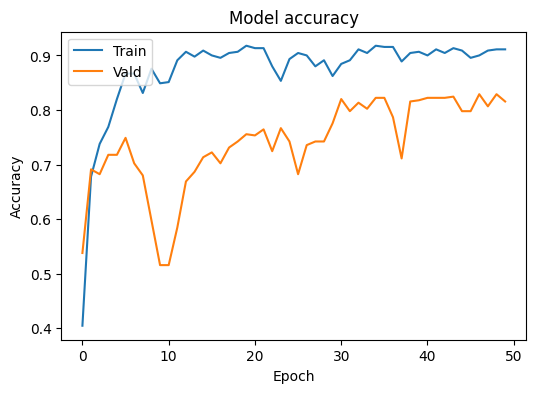

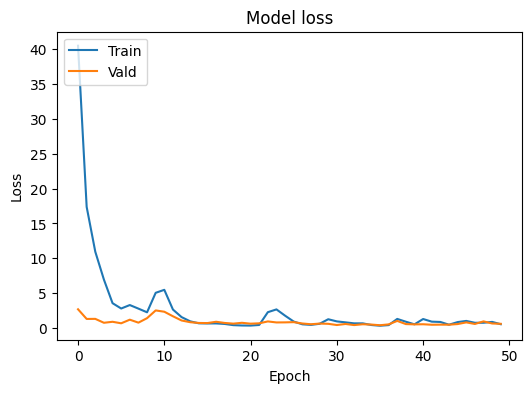

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_21 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_21 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_21 (Flatten)        (None, 319872)            0         
                                                                 
 dense_42 (Dense)            (None, 32)                102359

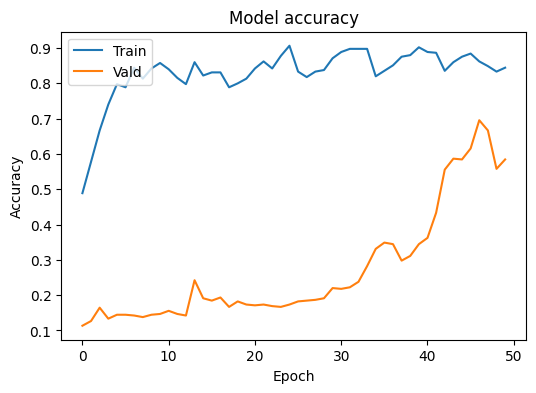

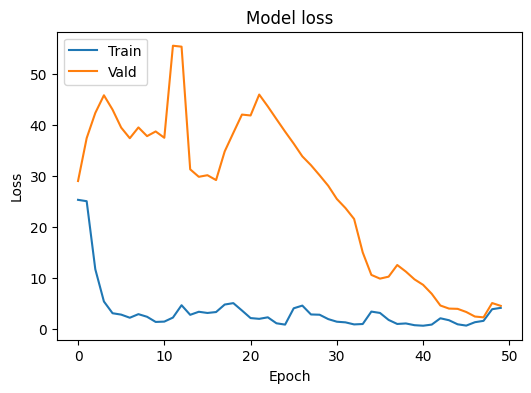

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_22 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_22 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_22 (Flatten)        (None, 319872)            0         
                                                                 
 dense_44 (Dense)            (None, 32)                102359

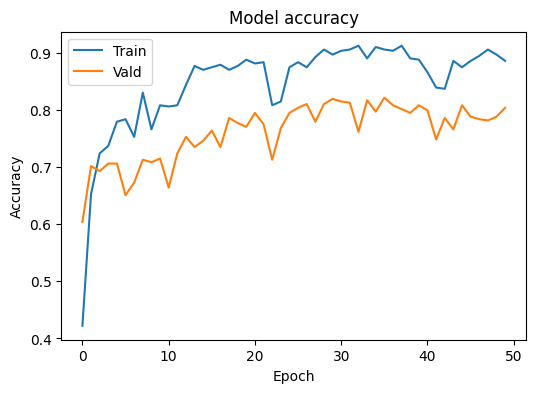

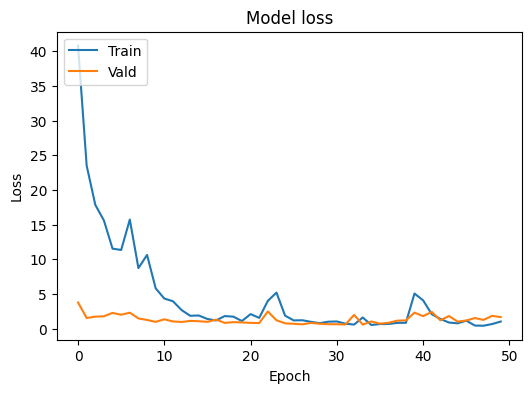

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_23 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_23 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_23 (Flatten)        (None, 319872)            0         
                                                                 
 dense_46 (Dense)            (None, 32)                102359

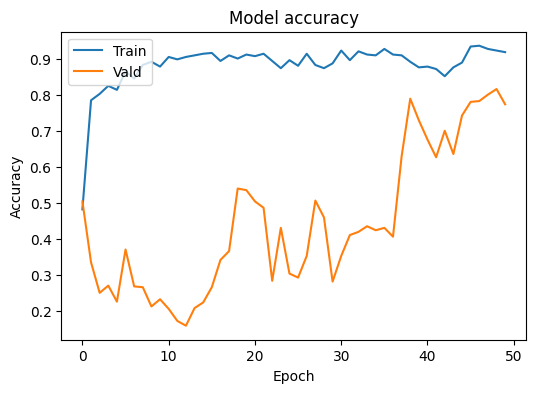

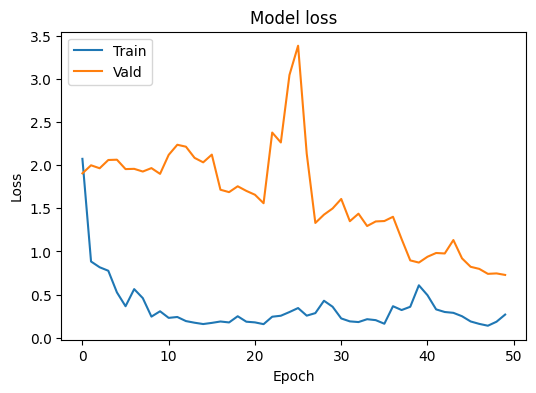

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_24 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_24 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_24 (Flatten)        (None, 319872)            0         
                                                                 
 dense_48 (Dense)            (None, 32)                102359

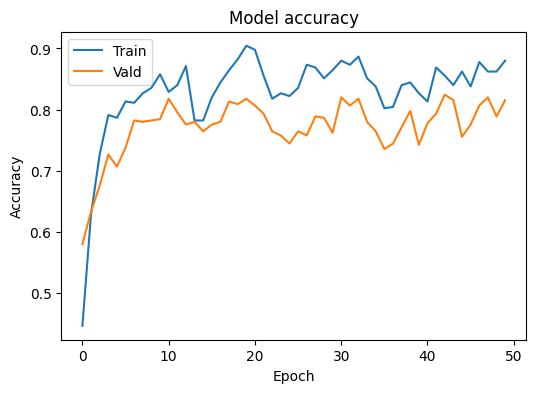

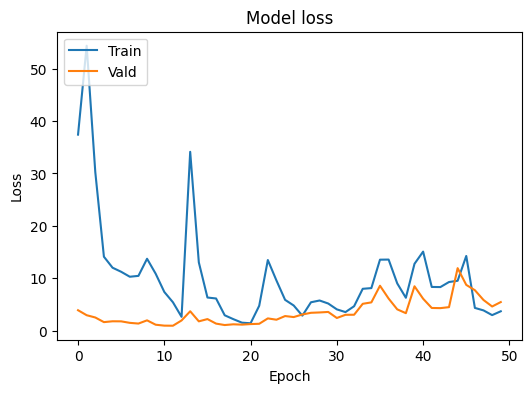

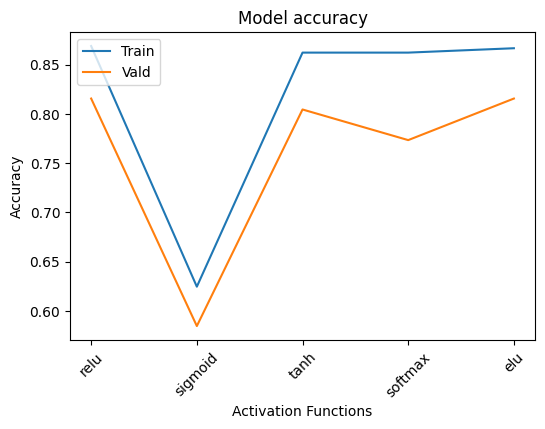

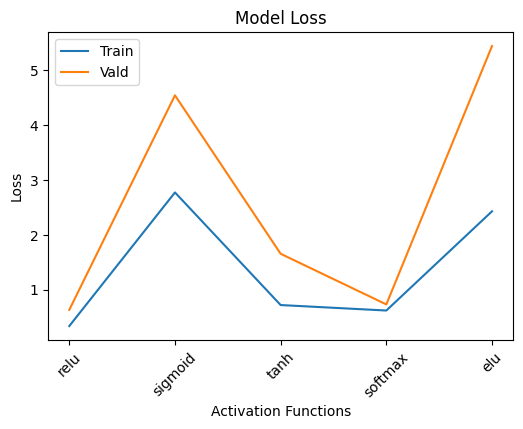

relu   sigmoid      tanh   softmax       elu
Activation Functions                                                  
Loss                  0.332891  2.772551  0.716282  0.616242  2.428071
Accuracy              0.868889  0.624444  0.862222  0.862222  0.866667

relu   sigmoid      tanh   softmax       elu
Activation Functions                                                  
Loss                  0.628409  4.545640  1.652518  0.727616  5.445381
Accuracy              0.815556  0.584444  0.804444  0.773333  0.815556

In [12]:
import keras
from keras import layers

# Define the activation functions  to try
activation_functions = ['relu', 'sigmoid', 'tanh', 'softmax', 'elu']



train_acc_list = {}
vald_acc_list = {}




for activation_function in activation_functions:
  inputs = keras.Input(shape = (Train_X.shape[1], Train_X.shape[2], Train_X.shape[3]))

  x = layers.Conv2D(filters = 64, kernel_size = (3, 3),strides=(2, 2), activation = activation_function) (inputs)
  x = layers.BatchNormalization()(x) 
  x = layers.MaxPooling2D(pool_size=(1, 1))(x)
  x = layers.Flatten()(x)
  
  x = layers.Dense(32, activation="relu")(x) 

  outputs = layers.Dense(Train_Y.shape[1], activation='softmax')(x)
  model = keras.Model(inputs, outputs, name="model") 
  model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy']) 
  model.summary()


  history = model.fit(Train_X, Train_Y, epochs=50,batch_size = 64, verbose=2, validation_data=(Vald_X, Vald_Y))

  print ('Training   ', model.metrics_names,' = ',model.evaluate(Train_X, Train_Y, verbose=0))
  print ('Validation ', model.metrics_names,' = ',model.evaluate(Vald_X, Vald_Y, verbose=0))


  train_acc_list[activation_function] = model.evaluate(Train_X, Train_Y, verbose=0)
  vald_acc_list[activation_function] = model.evaluate(Vald_X, Vald_Y, verbose=0)

  show_acc_los(history)
          

import pandas as pd
from IPython.display import display
df_train_act = pd.DataFrame(train_acc_list)
df_train_act['Activation Functions'] = ['Loss', 'Accuracy']
df_train_act.set_index('Activation Functions', inplace=True)
df_vald_act = pd.DataFrame(vald_acc_list)
df_vald_act['Activation Functions'] = ['Loss', 'Accuracy']
df_vald_act.set_index('Activation Functions', inplace=True)

show_acc_los_total(train_acc_list, vald_acc_list, "Activation Functions")
display(df_train_act)
display(df_vald_act)

##4- Optimizer


1. adam
2. sgd
3. rmsprop
4. adagrad
5. adadelta  

The best is sgd

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_25 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_25 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_25 (Flatten)        (None, 319872)            0         
                                                                 
 dense_50 (Dense)            (None, 32)                102359

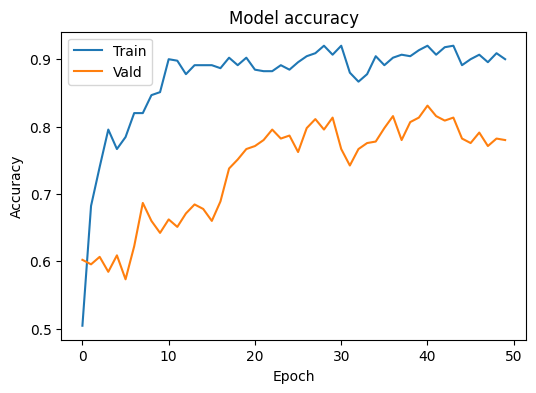

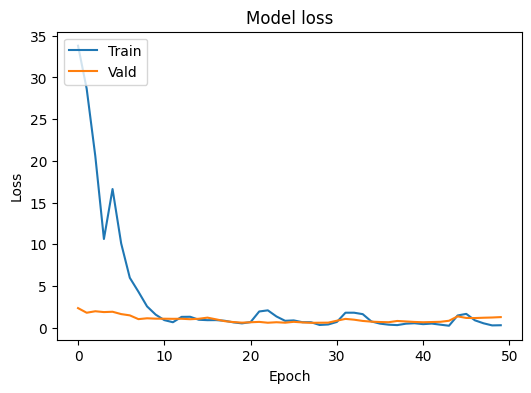

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_27 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_26 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_26 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_26 (Flatten)        (None, 319872)            0         
                                                                 
 dense_52 (Dense)            (None, 32)                102359

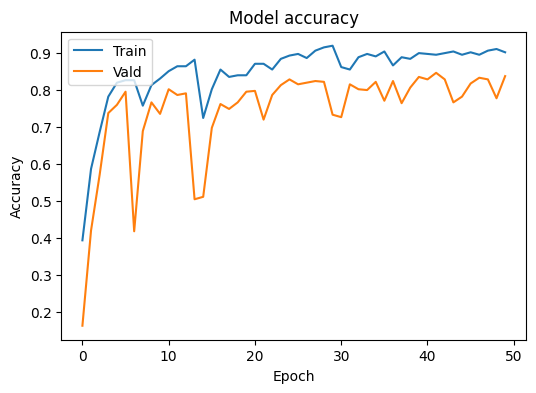

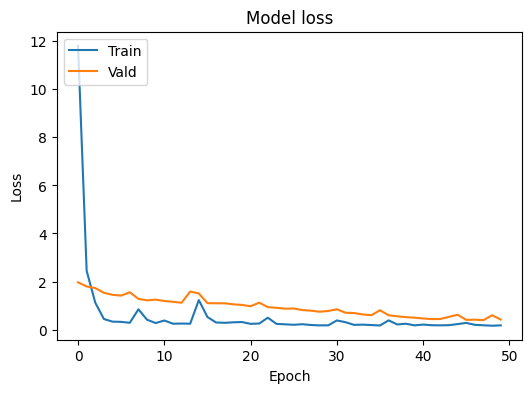

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_27 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_27 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_27 (Flatten)        (None, 319872)            0         
                                                                 
 dense_54 (Dense)            (None, 32)                102359

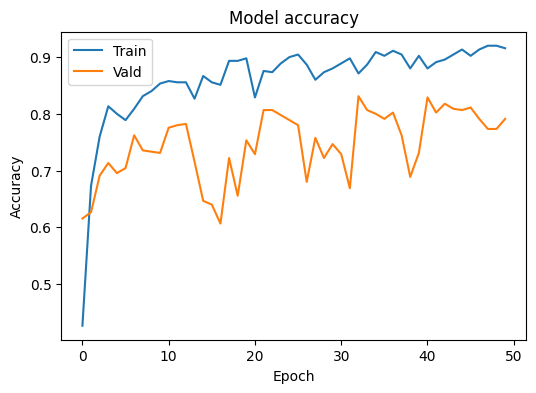

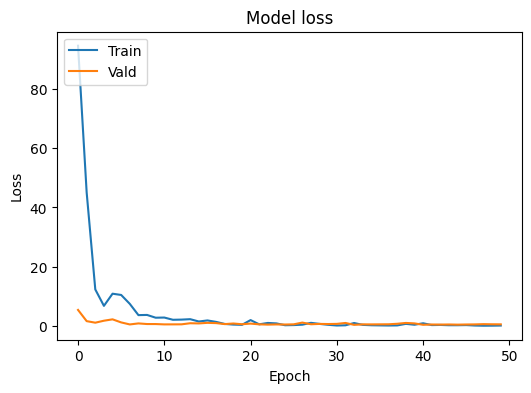

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_28 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_28 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_28 (Flatten)        (None, 319872)            0         
                                                                 
 dense_56 (Dense)            (None, 32)                102359

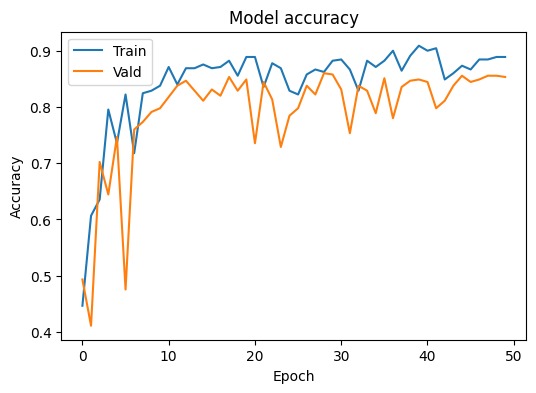

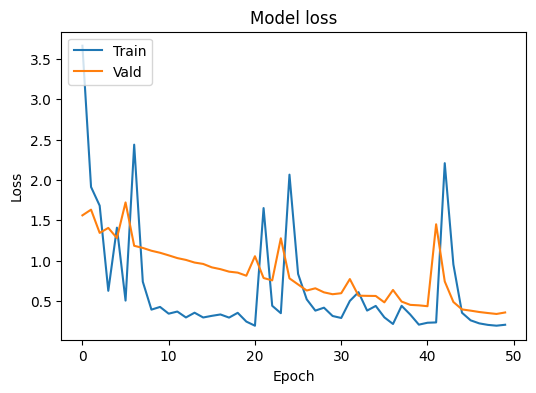

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_30 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_29 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_29 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_29 (Flatten)        (None, 319872)            0         
                                                                 
 dense_58 (Dense)            (None, 32)                102359

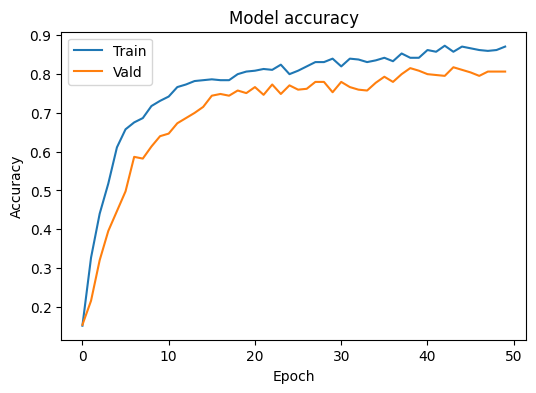

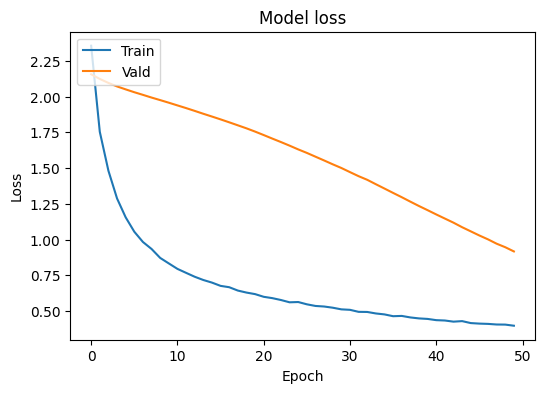

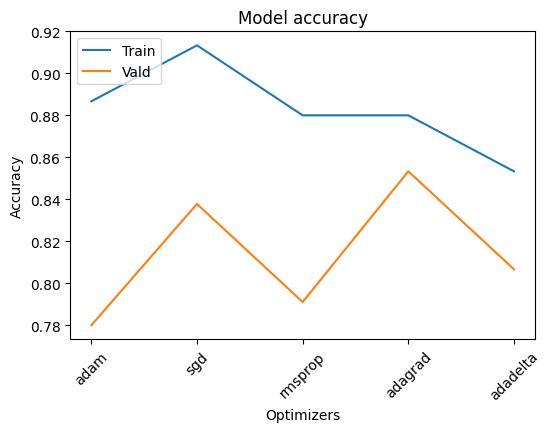

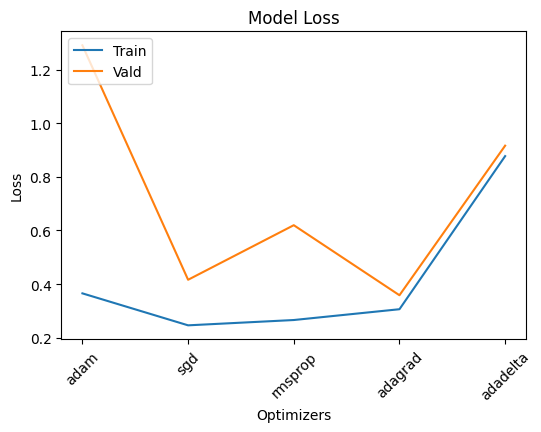

adam       sgd   rmsprop   adagrad  adadelta
Optimizer                                                  
Loss       0.365252  0.245915  0.265749  0.306055  0.877537
Accuracy   0.886667  0.913333  0.880000  0.880000  0.853333

adam       sgd   rmsprop   adagrad  adadelta
Optimizer                                                  
Loss       1.291036  0.416000  0.619699  0.358249  0.916530
Accuracy   0.780000  0.837778  0.791111  0.853333  0.806667

In [13]:
import keras
from keras import layers

# Define the optimizers to try
optimizers = ['adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta']



train_acc_list = {}
vald_acc_list = {}




for optimizer in optimizers:
  inputs = keras.Input(shape = (Train_X.shape[1], Train_X.shape[2], Train_X.shape[3]))

  x = layers.Conv2D(filters = 64, kernel_size = (3, 3),strides=(2, 2), activation = "relu") (inputs)
  x = layers.BatchNormalization()(x) 
  x = layers.MaxPooling2D(pool_size=(1, 1))(x)
  x = layers.Flatten()(x)
  
  x = layers.Dense(32, activation="relu")(x) 

  outputs = layers.Dense(Train_Y.shape[1], activation='softmax')(x)
  model = keras.Model(inputs, outputs, name="model") 
  model.compile(optimizer=optimizer, loss='CategoricalCrossentropy', metrics=['accuracy']) 
  model.summary()


  history = model.fit(Train_X, Train_Y, epochs=50,batch_size = 64, verbose=2, validation_data=(Vald_X, Vald_Y))

  print ('Training   ', model.metrics_names,' = ',model.evaluate(Train_X, Train_Y, verbose=0))
  print ('Validation ', model.metrics_names,' = ',model.evaluate(Vald_X, Vald_Y, verbose=0))


  train_acc_list[optimizer] = model.evaluate(Train_X, Train_Y, verbose=0)
  vald_acc_list[optimizer] = model.evaluate(Vald_X, Vald_Y, verbose=0)

  show_acc_los(history)
          

import pandas as pd
from IPython.display import display
df_train_opt = pd.DataFrame(train_acc_list)
df_train_opt['Optimizer'] = ['Loss', 'Accuracy']
df_train_opt.set_index('Optimizer', inplace=True)
df_vald_opt = pd.DataFrame(vald_acc_list)
df_vald_opt['Optimizer'] = ['Loss', 'Accuracy']
df_vald_opt.set_index('Optimizer', inplace=True)

show_acc_los_total(train_acc_list, vald_acc_list, "Optimizers")
display(df_train_opt)
display(df_vald_opt)

##5- Batch size, epochs, Learning rate


1. Batch size (32, 64, 128, 256)
2. epochs ( 20, 50, 100, 150 ,200)
3. Learning rate 

best batch size 64  
no big different between epochs 100 ~ 200, so the best is 100   
best learning rate 0.001





Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_31 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_30 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_30 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_30 (Flatten)        (None, 319872)            0         
                                                                 
 dense_60 (Dense)            (None, 32)                102359

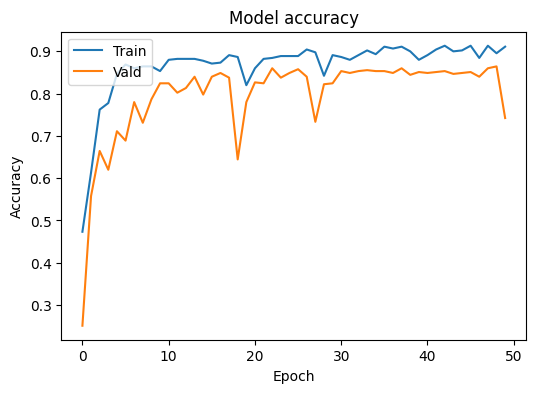

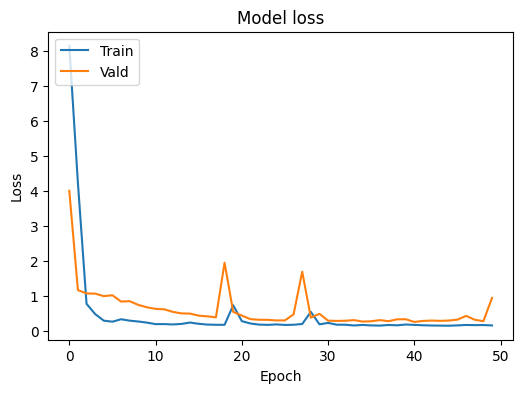

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_32 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_31 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_31 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_31 (Flatten)        (None, 319872)            0         
                                                                 
 dense_62 (Dense)            (None, 32)                102359

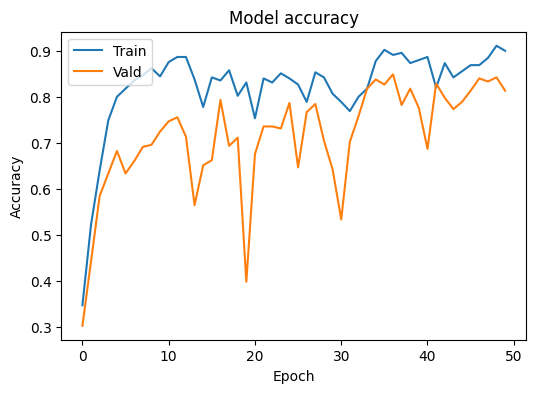

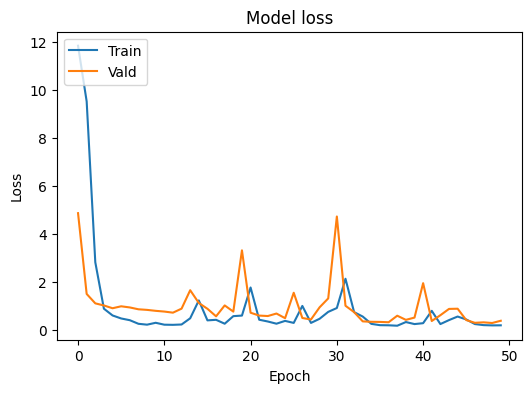

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_33 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_32 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_32 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_32 (Flatten)        (None, 319872)            0         
                                                                 
 dense_64 (Dense)            (None, 32)                102359

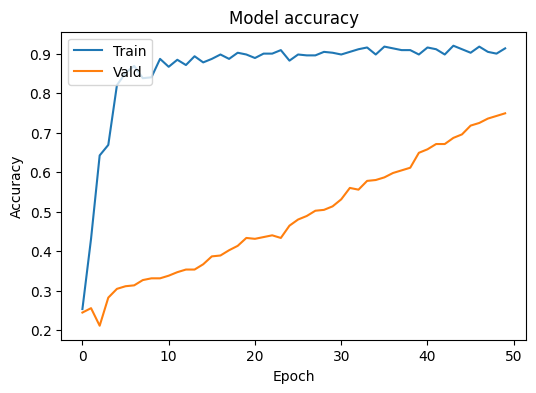

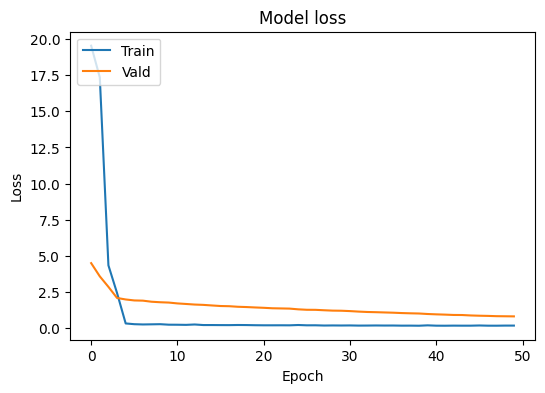

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_34 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_33 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_33 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_33 (Flatten)        (None, 319872)            0         
                                                                 
 dense_66 (Dense)            (None, 32)                102359

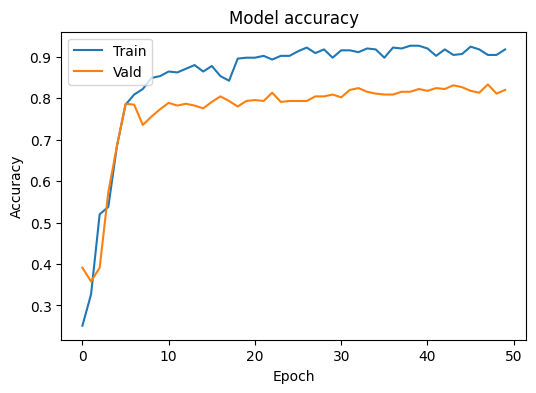

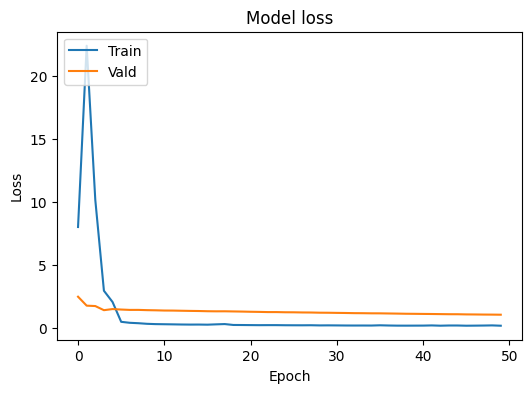

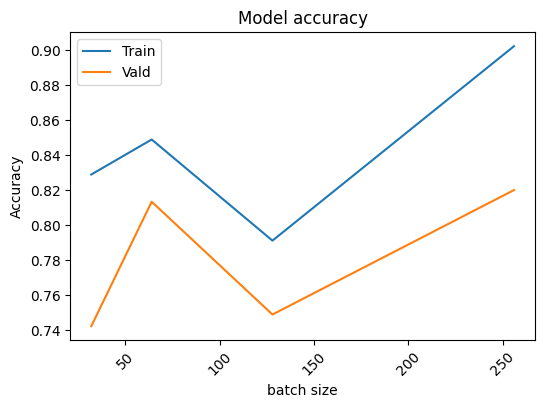

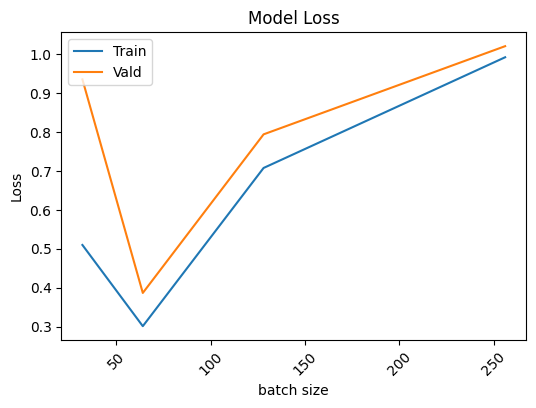

32        64       128       256
batch_size                                        
Loss        0.509734  0.300966  0.707722  0.992330
Accuracy    0.828889  0.848889  0.791111  0.902222

32        64       128       256
batch_size                                        
Loss        0.935420  0.386393  0.794128  1.020834
Accuracy    0.742222  0.813333  0.748889  0.820000

In [14]:
import keras
from keras import layers

# Define the batch sizes to try
batch_sizes = [32, 64, 128, 256]  


train_acc_list = {}
vald_acc_list = {}




for batch_size in batch_sizes:
  inputs = keras.Input(shape = (Train_X.shape[1], Train_X.shape[2], Train_X.shape[3]))

  x = layers.Conv2D(filters = 64, kernel_size = (3, 3),strides=(2, 2), activation = "relu") (inputs)
  x = layers.BatchNormalization()(x) 
  x = layers.MaxPooling2D(pool_size=(1, 1))(x)
  x = layers.Flatten()(x)
  
  x = layers.Dense(32, activation="relu")(x) 

  outputs = layers.Dense(Train_Y.shape[1], activation='softmax')(x)
  model = keras.Model(inputs, outputs, name="model") 
  model.compile(optimizer='sgd', loss='CategoricalCrossentropy', metrics=['accuracy']) 
  model.summary()


  history = model.fit(Train_X, Train_Y, epochs=50,batch_size = batch_size, verbose=2, validation_data=(Vald_X, Vald_Y))

  print ('Training   ', model.metrics_names,' = ',model.evaluate(Train_X, Train_Y, verbose=0))
  print ('Validation ', model.metrics_names,' = ',model.evaluate(Vald_X, Vald_Y, verbose=0))


  train_acc_list[batch_size] = model.evaluate(Train_X, Train_Y, verbose=0)
  vald_acc_list[batch_size] = model.evaluate(Vald_X, Vald_Y, verbose=0)

  show_acc_los(history)
          

import pandas as pd
from IPython.display import display
df_train_bat = pd.DataFrame(train_acc_list)
df_train_bat['batch_size'] = ['Loss', 'Accuracy']
df_train_bat.set_index('batch_size', inplace=True)
df_vald_bat = pd.DataFrame(vald_acc_list)
df_vald_bat['batch_size'] = ['Loss', 'Accuracy']
df_vald_bat.set_index('batch_size', inplace=True)

show_acc_los_total(train_acc_list, vald_acc_list, "batch size")
display(df_train_bat)
display(df_vald_bat)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_35 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_34 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_34 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_34 (Flatten)        (None, 319872)            0         
                                                                 
 dense_68 (Dense)            (None, 32)                102359

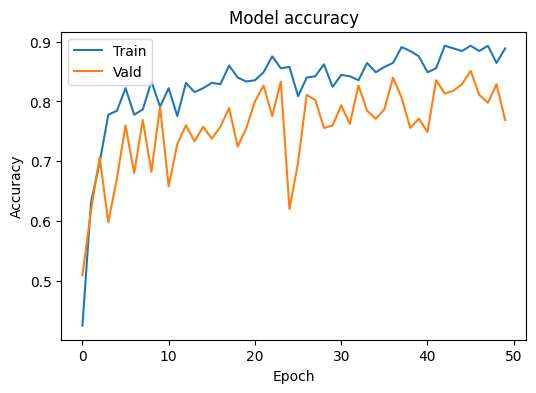

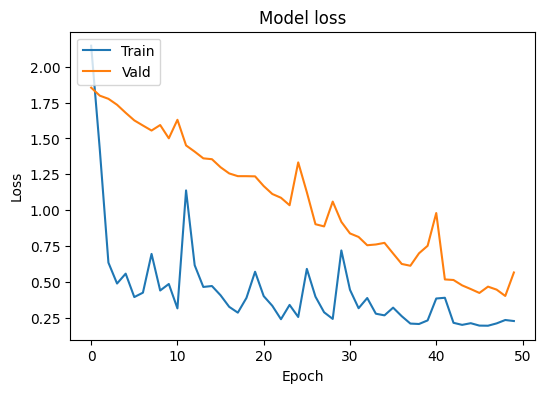

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_36 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_35 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_35 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_35 (Flatten)        (None, 319872)            0         
                                                                 
 dense_70 (Dense)            (None, 32)                102359

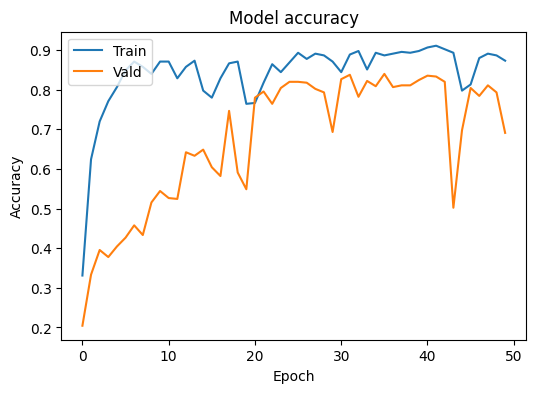

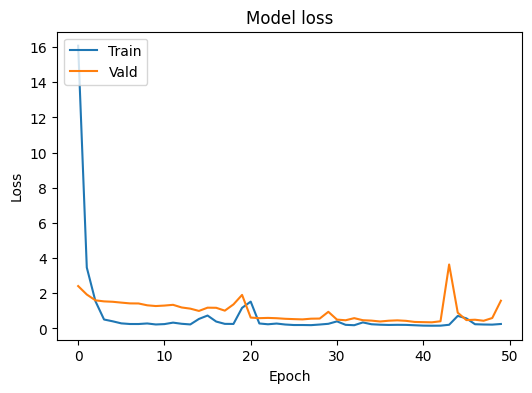

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_37 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_36 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_36 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_36 (Flatten)        (None, 319872)            0         
                                                                 
 dense_72 (Dense)            (None, 32)                102359

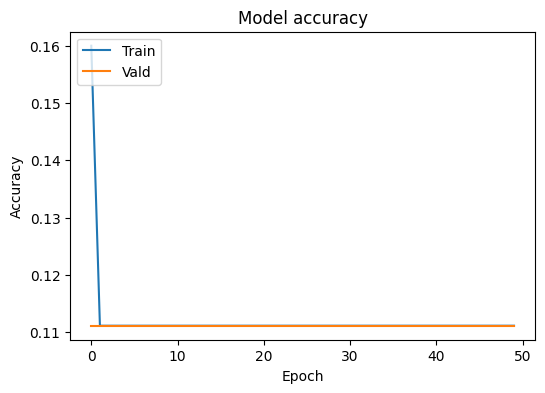

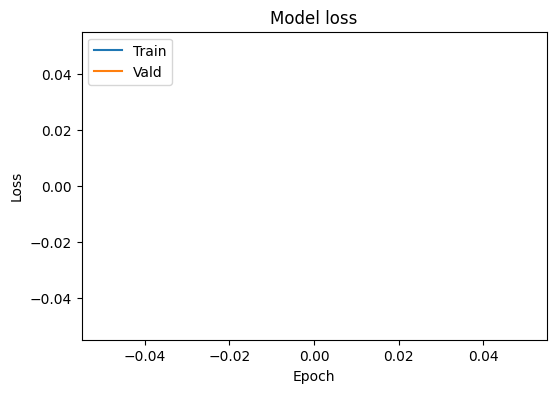

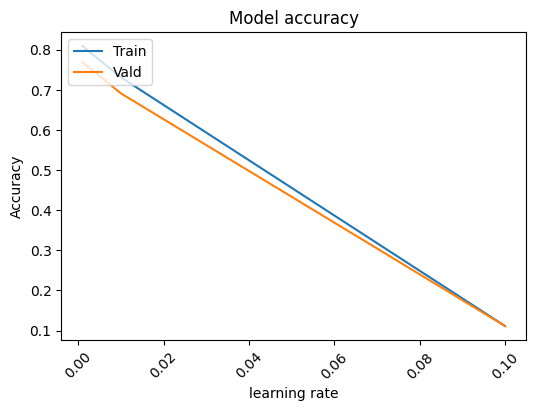

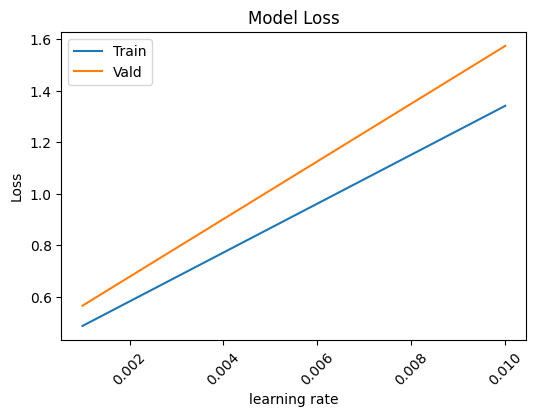

0.001      0.01       0.1
learning_rate                              
Loss           0.487118  1.342326       NaN
Accuracy       0.808889  0.731111  0.111111

0.001      0.01       0.1
learning_rate                              
Loss           0.565703  1.575053       NaN
Accuracy       0.768889  0.691111  0.111111

In [15]:
import keras
from keras import layers
from keras.optimizers import SGD

# Define the learning rates to try
learning_rates = [0.001, 0.01, 0.1]  


train_acc_list = {}
vald_acc_list = {}




for lr in learning_rates:
  inputs = keras.Input(shape = (Train_X.shape[1], Train_X.shape[2], Train_X.shape[3]))

  x = layers.Conv2D(filters = 64, kernel_size = (3, 3),strides=(2, 2), activation = "relu") (inputs)
  x = layers.BatchNormalization()(x) 
  x = layers.MaxPooling2D(pool_size=(1, 1))(x)
  x = layers.Flatten()(x)
  
  x = layers.Dense(32, activation="relu")(x) 

  outputs = layers.Dense(Train_Y.shape[1], activation='softmax')(x)
  model = keras.Model(inputs, outputs, name="model") 
  optimizer = SGD(learning_rate=lr)  # Set the learning rate for the optimizer
  model.compile(optimizer=optimizer, loss='CategoricalCrossentropy', metrics=['accuracy']) 
  model.summary()


  history = model.fit(Train_X, Train_Y, epochs=50,batch_size = 64, verbose=2, validation_data=(Vald_X, Vald_Y))

  print ('Training   ', model.metrics_names,' = ',model.evaluate(Train_X, Train_Y, verbose=0))
  print ('Validation ', model.metrics_names,' = ',model.evaluate(Vald_X, Vald_Y, verbose=0))


  train_acc_list[lr] = model.evaluate(Train_X, Train_Y, verbose=0)
  vald_acc_list[lr] = model.evaluate(Vald_X, Vald_Y, verbose=0)

  show_acc_los(history)
          

import pandas as pd
from IPython.display import display
df_train_lr = pd.DataFrame(train_acc_list)
df_train_lr['learning_rate'] = ['Loss', 'Accuracy']
df_train_lr.set_index('learning_rate', inplace=True)
df_vald_lr = pd.DataFrame(vald_acc_list)
df_vald_lr['learning_rate'] = ['Loss', 'Accuracy']
df_vald_lr.set_index('learning_rate', inplace=True)

show_acc_los_total(train_acc_list, vald_acc_list, "learning rate")
display(df_train_lr)
display(df_vald_lr)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_38 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_37 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_37 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_37 (Flatten)        (None, 319872)            0         
                                                                 
 dense_74 (Dense)            (None, 32)                102359

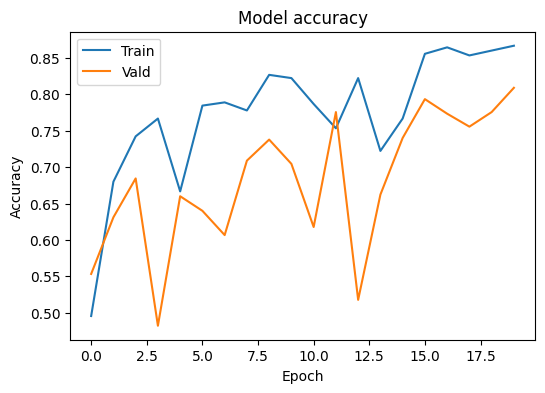

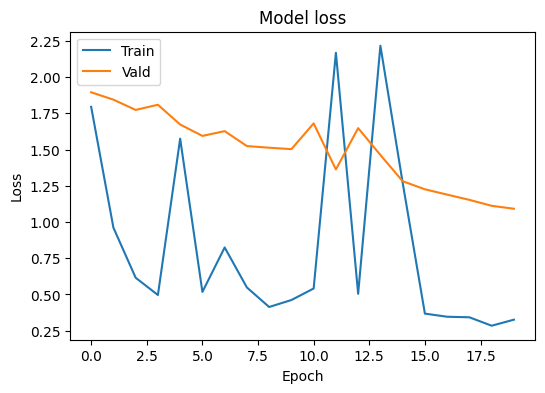

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_39 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_38 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_38 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_38 (Flatten)        (None, 319872)            0         
                                                                 
 dense_76 (Dense)            (None, 32)                102359

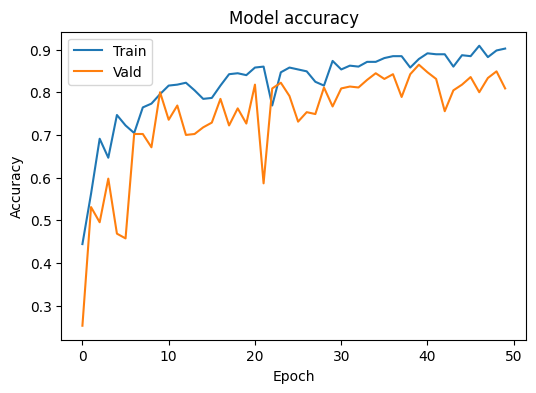

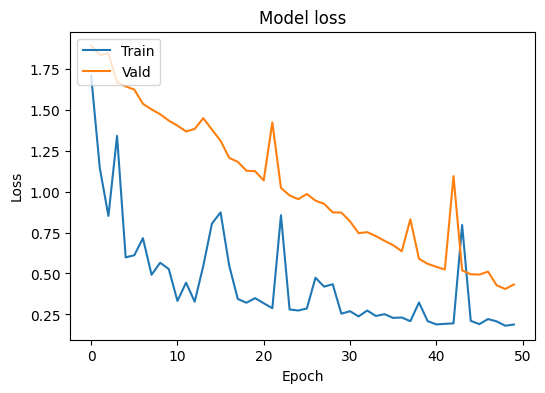

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_40 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_39 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_39 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_39 (Flatten)        (None, 319872)            0         
                                                                 
 dense_78 (Dense)            (None, 32)                102359

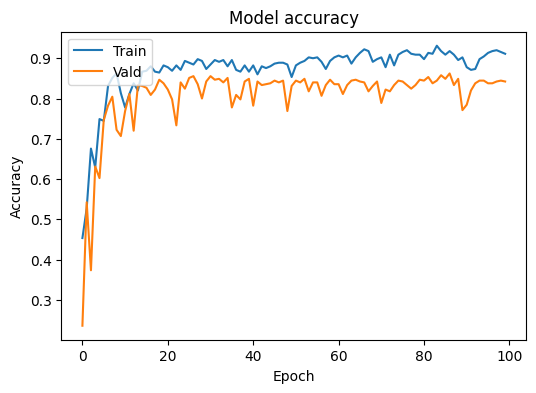

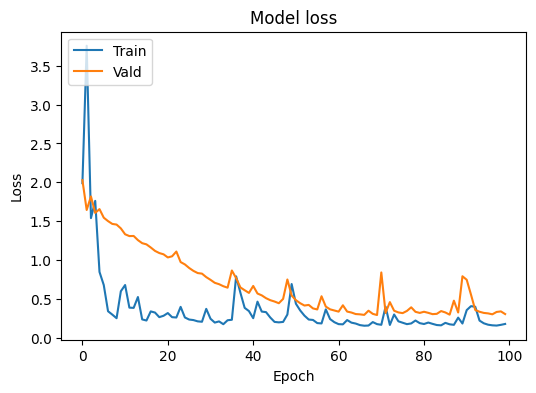

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_41 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_40 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_40 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_40 (Flatten)        (None, 319872)            0         
                                                                 
 dense_80 (Dense)            (None, 32)                102359

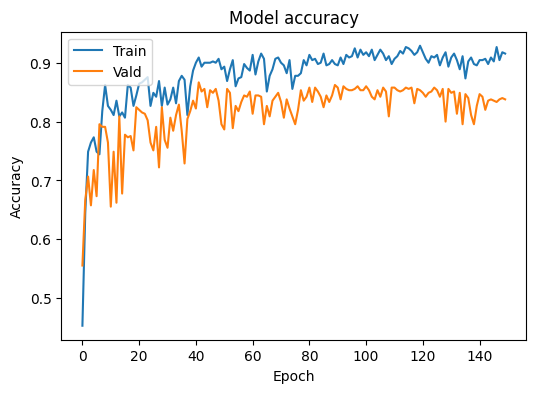

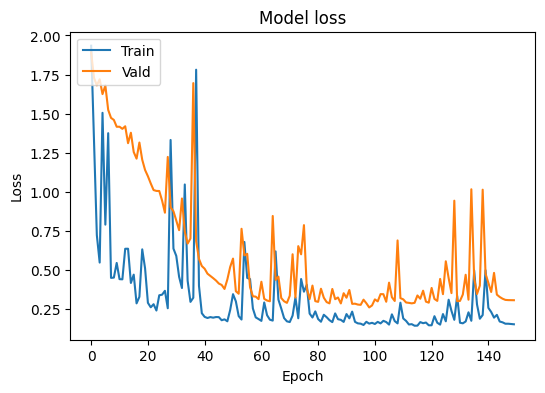

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_42 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_41 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_41 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_41 (Flatten)        (None, 319872)            0         
                                                                 
 dense_82 (Dense)            (None, 32)                102359

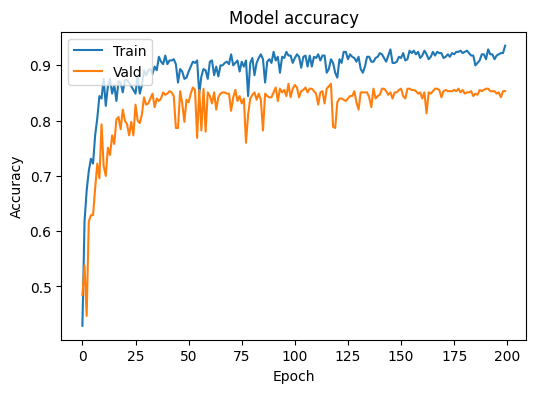

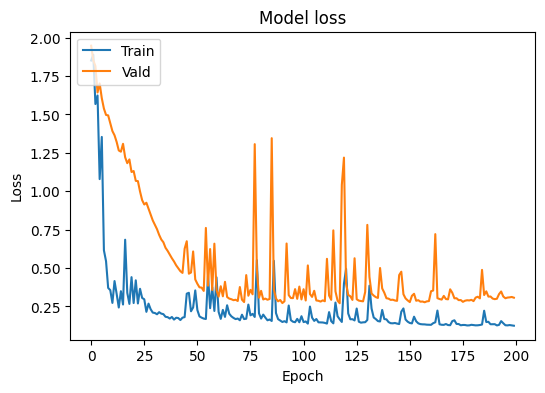

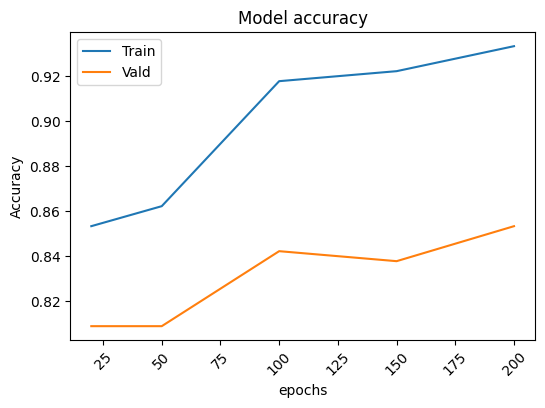

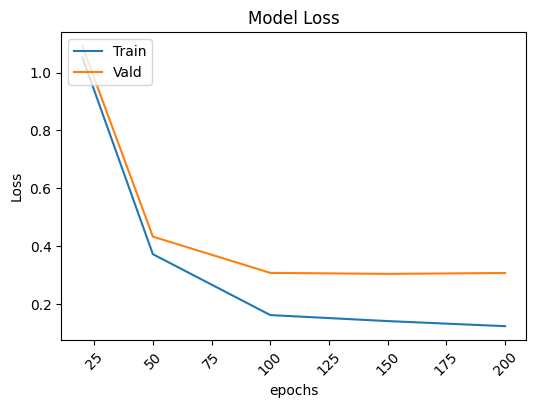

20        50       100       150       200
epoch                                                     
Loss      1.052442  0.372164  0.161550  0.140748  0.123165
Accuracy  0.853333  0.862222  0.917778  0.922222  0.933333

20        50       100       150       200
epoch                                                     
Loss      1.091422  0.432814  0.307453  0.303986  0.307060
Accuracy  0.808889  0.808889  0.842222  0.837778  0.853333

In [16]:
import keras
from keras import layers
from keras.optimizers import SGD

# Define the epochs to try
epochs = [20, 50, 100, 150, 200]  


train_acc_list = {}
vald_acc_list = {}




for epoch in epochs:
  inputs = keras.Input(shape = (Train_X.shape[1], Train_X.shape[2], Train_X.shape[3]))

  x = layers.Conv2D(filters = 64, kernel_size = (3, 3),strides=(2, 2), activation = "relu") (inputs)
  x = layers.BatchNormalization()(x) 
  x = layers.MaxPooling2D(pool_size=(1, 1))(x)
  x = layers.Flatten()(x)
  
  x = layers.Dense(32, activation="relu")(x) 

  outputs = layers.Dense(Train_Y.shape[1], activation='softmax')(x)
  model = keras.Model(inputs, outputs, name="model") 
  optimizer = SGD(learning_rate=0.001)  
  model.compile(optimizer=optimizer, loss='CategoricalCrossentropy', metrics=['accuracy']) 
  model.summary()


  history = model.fit(Train_X, Train_Y, epochs=epoch,batch_size = 64, verbose=2, validation_data=(Vald_X, Vald_Y))

  print ('Training   ', model.metrics_names,' = ',model.evaluate(Train_X, Train_Y, verbose=0))
  print ('Validation ', model.metrics_names,' = ',model.evaluate(Vald_X, Vald_Y, verbose=0))


  train_acc_list[epoch] = model.evaluate(Train_X, Train_Y, verbose=0)
  vald_acc_list[epoch] = model.evaluate(Vald_X, Vald_Y, verbose=0)

  show_acc_los(history)
          

import pandas as pd
from IPython.display import display
df_train_ep = pd.DataFrame(train_acc_list)
df_train_ep['epoch'] = ['Loss', 'Accuracy']
df_train_ep.set_index('epoch', inplace=True)
df_vald_ep = pd.DataFrame(vald_acc_list)
df_vald_ep['epoch'] = ['Loss', 'Accuracy']
df_vald_ep.set_index('epoch', inplace=True)

show_acc_los_total(train_acc_list, vald_acc_list, "epochs")
display(df_train_ep)
display(df_vald_ep)

##6- Depth of CNN


(1 ~ 4)  
it seems that 1 layer is doing good at training, but 4 layers doing better at validation, so we will use 4 layers

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_43 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_42 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_42 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_42 (Flatten)        (None, 319872)            0         
                                                                 
 dense_84 (Dense)            (None, 32)                102359

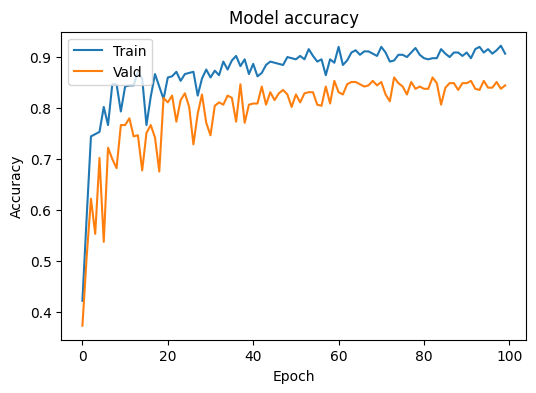

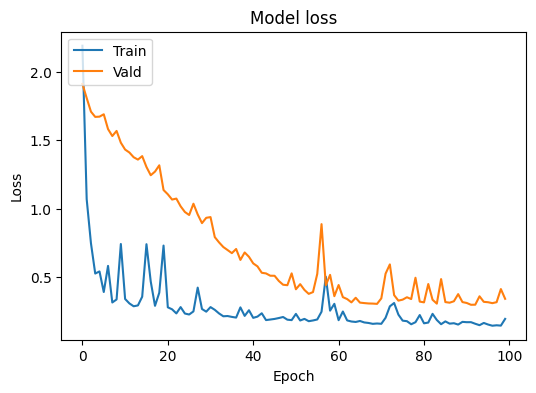

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_44 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_44 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_44 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_43 (Flatten)        (None, 319872)            0         
                                                                 
 dense_86 (Dense)            (None, 32)                102359

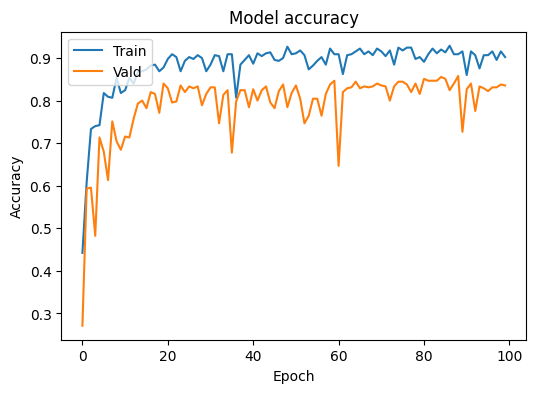

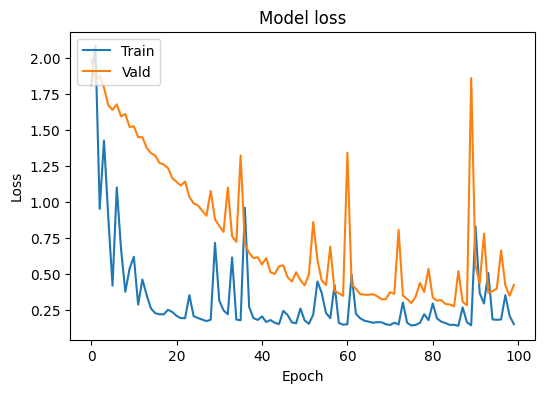

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_45 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_47 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_47 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_44 (Flatten)        (None, 319872)            0         
                                                                 
 dense_88 (Dense)            (None, 32)                102359

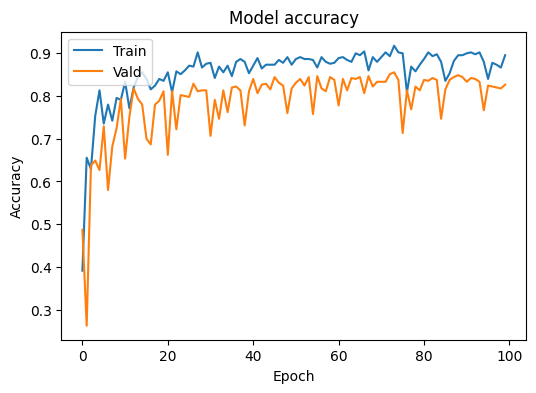

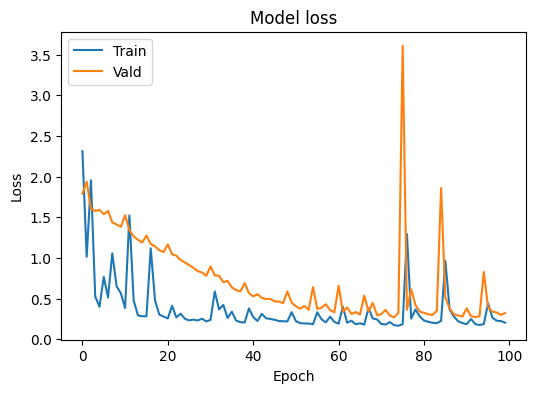

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_46 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_51 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_51 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_45 (Flatten)        (None, 319872)            0         
                                                                 
 dense_90 (Dense)            (None, 32)                102359

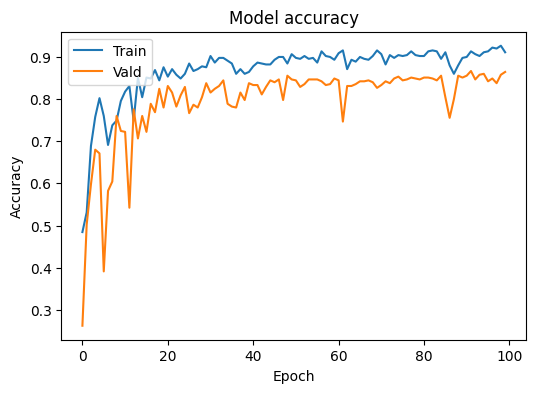

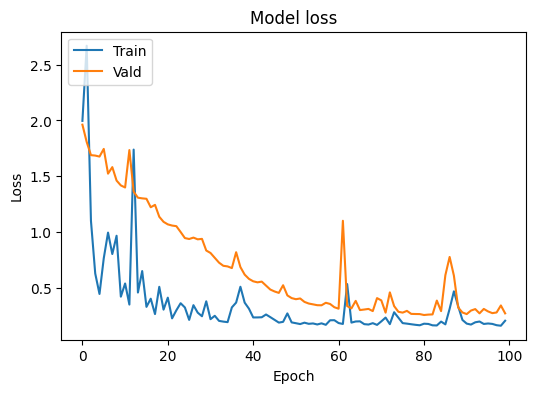

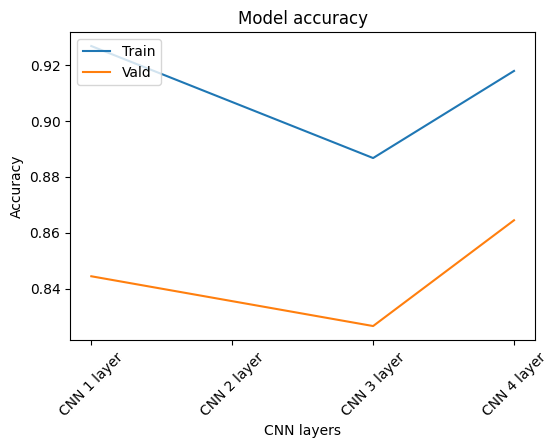

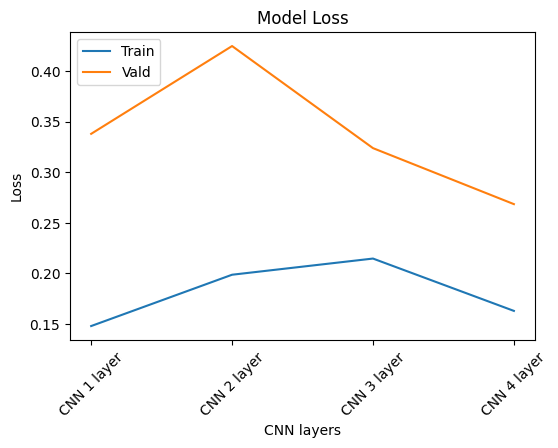

CNN 1 layer  CNN 2 layer  CNN 3 layer  CNN 4 layer
CNN_layers                                                    
Loss           0.147783     0.198551     0.214549     0.162775
Accuracy       0.926667     0.906667     0.886667     0.917778

CNN 1 layer  CNN 2 layer  CNN 3 layer  CNN 4 layer
CNN_layers                                                    
Loss           0.337943     0.424793     0.323796     0.268397
Accuracy       0.844444     0.835556     0.826667     0.864444

In [17]:
import keras
from keras import layers
from keras.optimizers import SGD




train_acc_list = {}
vald_acc_list = {}




for n in range (1, 5):
  inputs = keras.Input(shape = (Train_X.shape[1], Train_X.shape[2], Train_X.shape[3]))
  for j in range(n):
    x = layers.Conv2D(filters = 64, kernel_size = (3, 3),strides=(2, 2), activation = "relu") (inputs)
    x = layers.BatchNormalization()(x) 
    x = layers.MaxPooling2D(pool_size=(1, 1))(x)

  x = layers.Flatten()(x)
  
  x = layers.Dense(32, activation="relu")(x) 

  outputs = layers.Dense(Train_Y.shape[1], activation='softmax')(x)
  model = keras.Model(inputs, outputs, name="model") 
  optimizer = SGD(learning_rate=0.001)  
  model.compile(optimizer=optimizer, loss='CategoricalCrossentropy', metrics=['accuracy']) 
  model.summary()


  history = model.fit(Train_X, Train_Y, epochs=100,batch_size = 64, verbose=2, validation_data=(Vald_X, Vald_Y))

  print ('Training   ', model.metrics_names,' = ',model.evaluate(Train_X, Train_Y, verbose=0))
  print ('Validation ', model.metrics_names,' = ',model.evaluate(Vald_X, Vald_Y, verbose=0))


  train_acc_list["CNN {} layer".format(n)] = model.evaluate(Train_X, Train_Y, verbose=0)
  vald_acc_list["CNN {} layer".format(n)] = model.evaluate(Vald_X, Vald_Y, verbose=0)

  show_acc_los(history)
          

import pandas as pd
from IPython.display import display
df_train_cnn_lay = pd.DataFrame(train_acc_list)
df_train_cnn_lay['CNN_layers'] = ['Loss', 'Accuracy']
df_train_cnn_lay.set_index('CNN_layers', inplace=True)
df_vald_cnn_lay = pd.DataFrame(vald_acc_list)
df_vald_cnn_lay['CNN_layers'] = ['Loss', 'Accuracy']
df_vald_cnn_lay.set_index('CNN_layers', inplace=True)

show_acc_los_total(train_acc_list, vald_acc_list, "CNN layers")
display(df_train_cnn_lay)
display(df_vald_cnn_lay)

##7- Depth of Dense Layer

1- dense filter size (32, 64, 128, 256)
2- dense layer(1 ~ 5)

best filter size 256  
best layers is 1

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_47 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_55 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_55 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_46 (Flatten)        (None, 319872)            0         
                                                                 
 dense_92 (Dense)            (None, 32)                102359

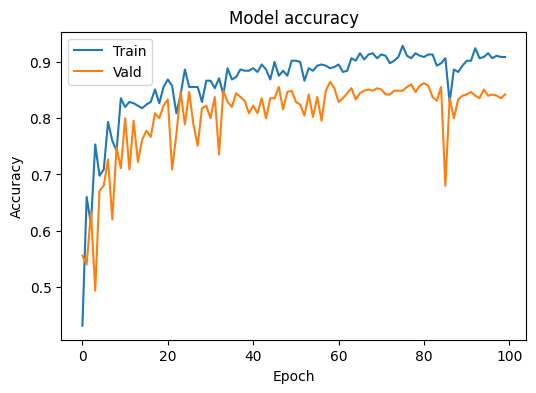

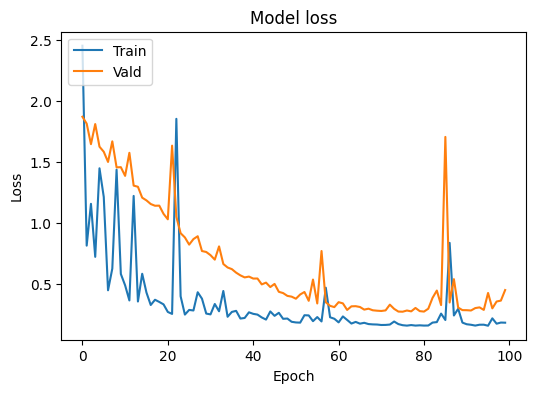

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_48 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_59 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_59 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_47 (Flatten)        (None, 319872)            0         
                                                                 
 dense_94 (Dense)            (None, 64)                204718

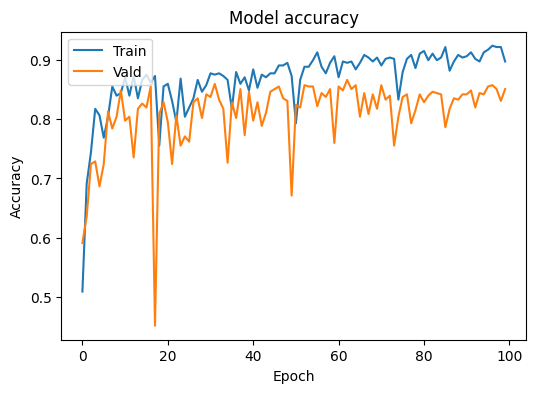

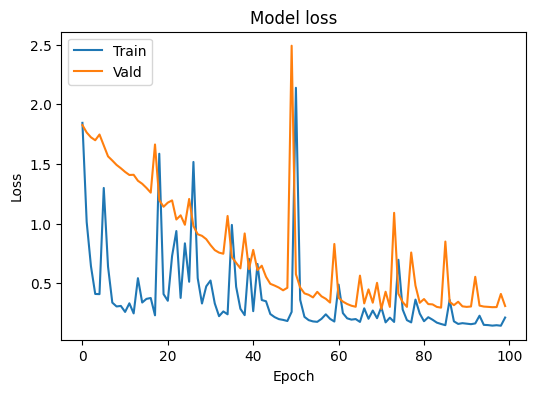

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_49 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_63 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_63 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_48 (Flatten)        (None, 319872)            0         
                                                                 
 dense_96 (Dense)            (None, 128)               409437

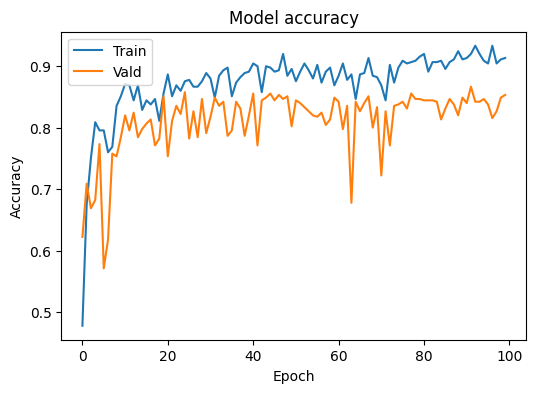

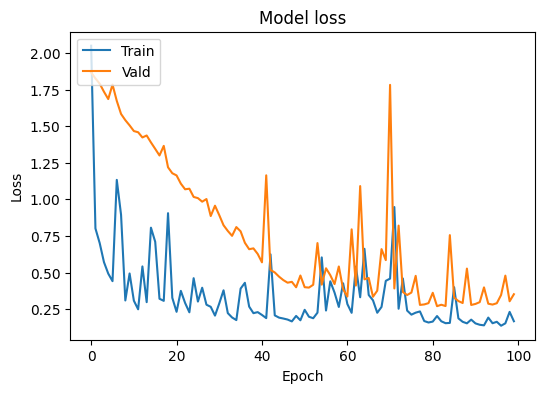

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_50 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_67 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_67 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_67 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_49 (Flatten)        (None, 319872)            0         
                                                                 
 dense_98 (Dense)            (None, 256)               818874

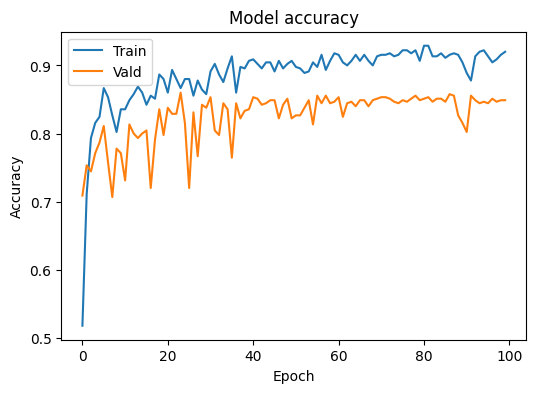

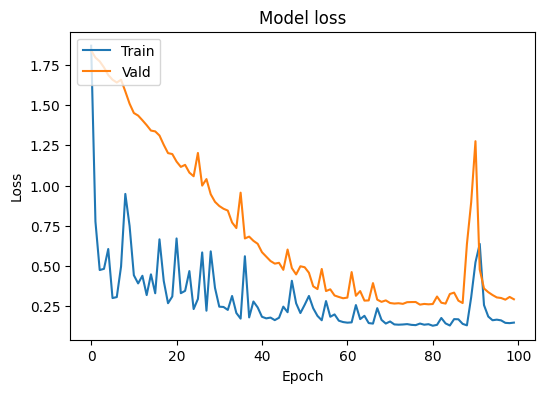

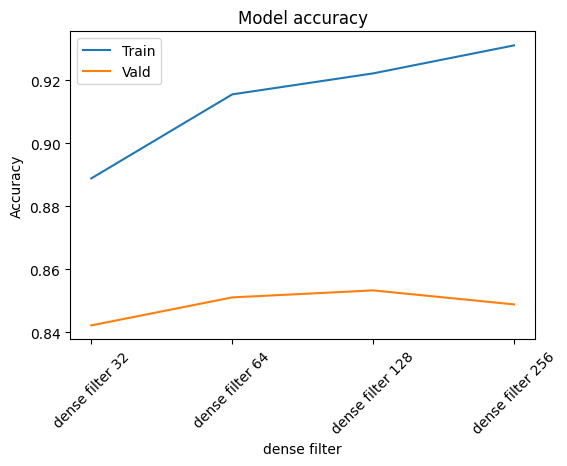

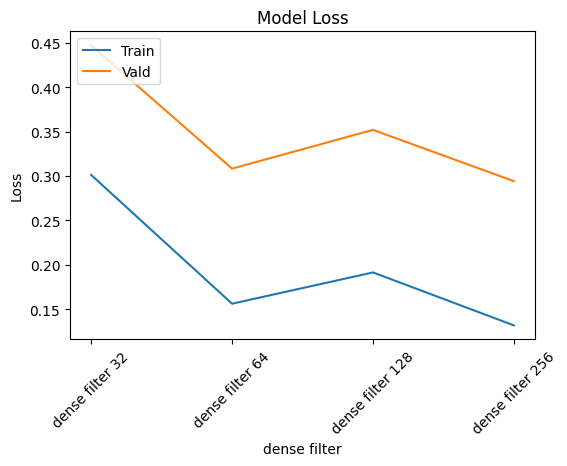

dense filter 32  dense filter 64  dense filter 128  \
dense_filter                                                       
Loss                 0.301068         0.156056          0.191269   
Accuracy             0.888889         0.915556          0.922222   

              dense filter 256  
dense_filter                    
Loss                  0.131621  
Accuracy              0.931111

dense filter 32  dense filter 64  dense filter 128  \
dense_filter                                                       
Loss                 0.446982         0.308190          0.351845   
Accuracy             0.842222         0.851111          0.853333   

              dense filter 256  
dense_filter                    
Loss                  0.294036  
Accuracy              0.848889

In [18]:
import keras
from keras import layers
from keras.optimizers import SGD


dense_list = [32, 64, 128, 256]

train_acc_list = {}
vald_acc_list = {}




for d in dense_list:
  inputs = keras.Input(shape = (Train_X.shape[1], Train_X.shape[2], Train_X.shape[3]))
  for j in range(4):
    x = layers.Conv2D(filters = 64, kernel_size = (3, 3),strides=(2, 2), activation = "relu") (inputs)
    x = layers.BatchNormalization()(x) 
    x = layers.MaxPooling2D(pool_size=(1, 1))(x)

  x = layers.Flatten()(x)
  
  x = layers.Dense(d, activation="relu")(x) 

  outputs = layers.Dense(Train_Y.shape[1], activation='softmax')(x)
  model = keras.Model(inputs, outputs, name="model") 
  optimizer = SGD(learning_rate=0.001)  
  model.compile(optimizer=optimizer, loss='CategoricalCrossentropy', metrics=['accuracy']) 
  model.summary()


  history = model.fit(Train_X, Train_Y, epochs=100,batch_size = 64, verbose=2, validation_data=(Vald_X, Vald_Y))

  print ('Training   ', model.metrics_names,' = ',model.evaluate(Train_X, Train_Y, verbose=0))
  print ('Validation ', model.metrics_names,' = ',model.evaluate(Vald_X, Vald_Y, verbose=0))


  train_acc_list["dense filter {}".format(d)] = model.evaluate(Train_X, Train_Y, verbose=0)
  vald_acc_list["dense filter {}".format(d)] = model.evaluate(Vald_X, Vald_Y, verbose=0)

  show_acc_los(history)
          

import pandas as pd
from IPython.display import display
df_train_d_fil = pd.DataFrame(train_acc_list)
df_train_d_fil['dense_filter'] = ['Loss', 'Accuracy']
df_train_d_fil.set_index('dense_filter', inplace=True)
df_vald_d_fil = pd.DataFrame(vald_acc_list)
df_vald_d_fil['dense_filter'] = ['Loss', 'Accuracy']
df_vald_d_fil.set_index('dense_filter', inplace=True)

show_acc_los_total(train_acc_list, vald_acc_list, "dense filter")
display(df_train_d_fil)
display(df_vald_d_fil)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_51 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_71 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_71 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_71 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_50 (Flatten)        (None, 319872)            0         
                                                                 
 dense_100 (Dense)           (None, 256)               818874

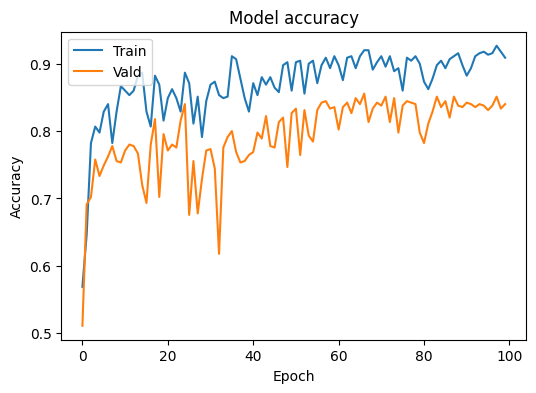

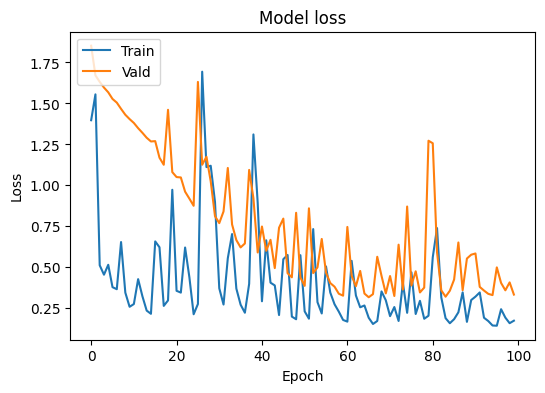

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_52 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_75 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_75 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_75 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_51 (Flatten)        (None, 319872)            0         
                                                                 
 dense_102 (Dense)           (None, 256)               818874

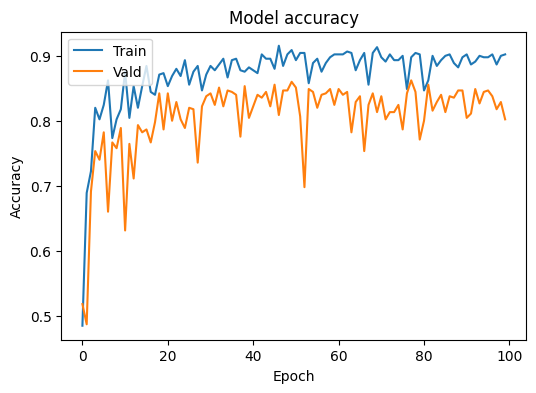

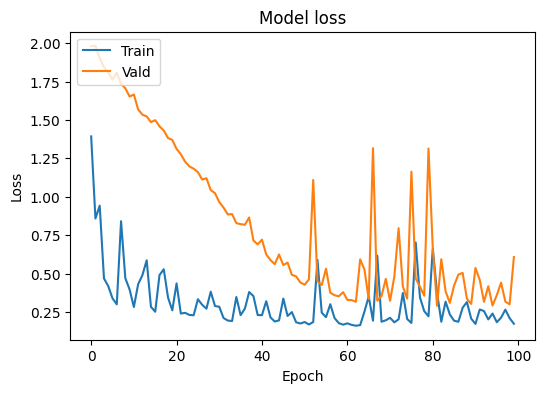

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_53 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_79 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_79 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_79 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_52 (Flatten)        (None, 319872)            0         
                                                                 
 dense_105 (Dense)           (None, 256)               818874

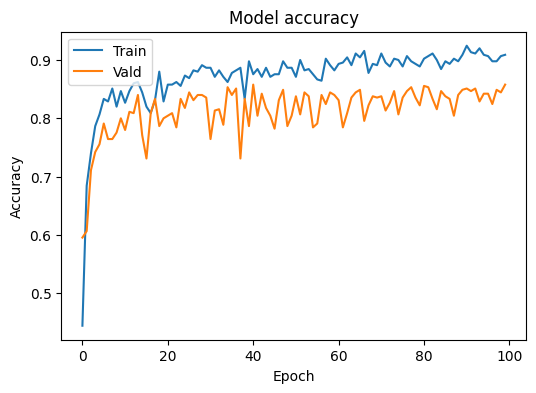

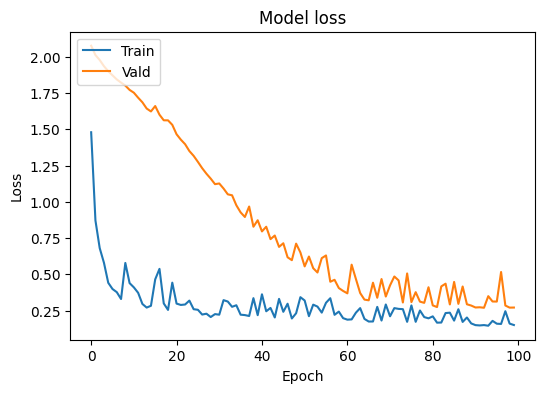

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_54 (InputLayer)       [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_83 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_83 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_83 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_53 (Flatten)        (None, 319872)            0         
                                                                 
 dense_109 (Dense)           (None, 256)               818874

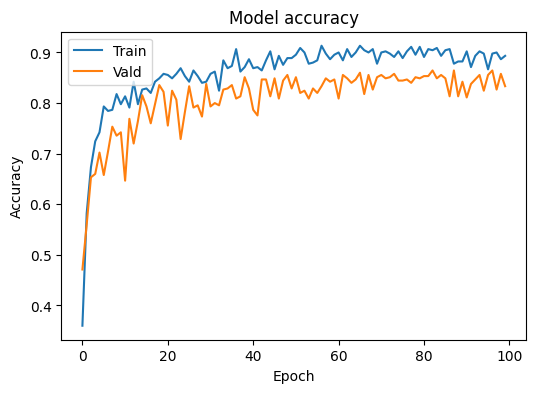

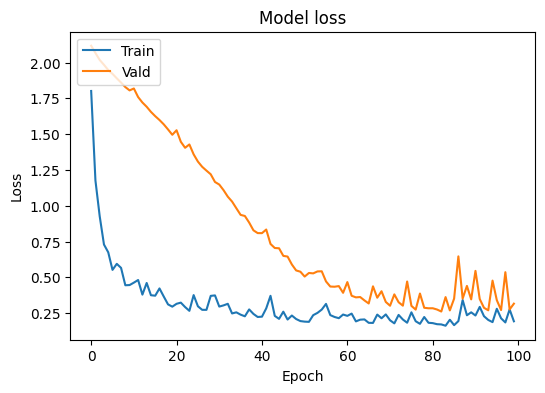

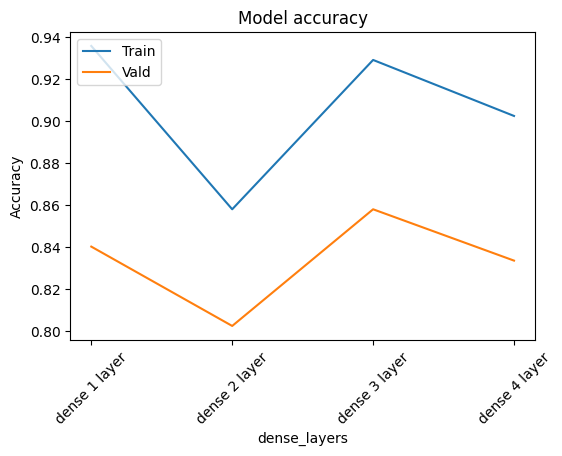

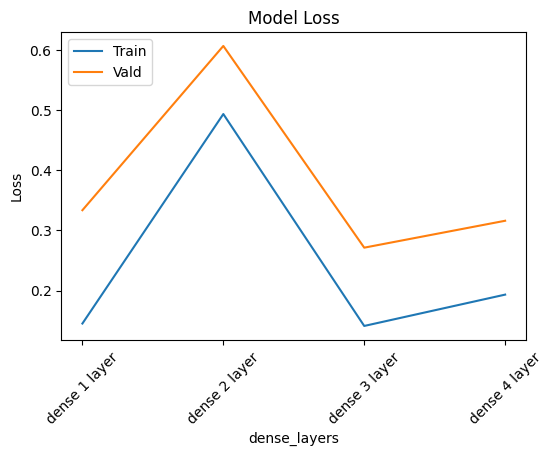

dense 1 layer  dense 2 layer  dense 3 layer  dense 4 layer
dense_layers                                                            
Loss               0.144990       0.494012       0.140948       0.193144
Accuracy           0.935556       0.857778       0.928889       0.902222

dense 1 layer  dense 2 layer  dense 3 layer  dense 4 layer
dense_layers                                                            
Loss               0.333791       0.607454       0.271375       0.316199
Accuracy           0.840000       0.802222       0.857778       0.833333

In [19]:
import keras
from keras import layers
from keras.optimizers import SGD




train_acc_list = {}
vald_acc_list = {}




for c in range(1, 5):
  inputs = keras.Input(shape = (Train_X.shape[1], Train_X.shape[2], Train_X.shape[3]))
  for j in range(4):
    x = layers.Conv2D(filters = 64, kernel_size = (3, 3),strides=(2, 2), activation = "relu") (inputs)
    x = layers.BatchNormalization()(x) 
    x = layers.MaxPooling2D(pool_size=(1, 1))(x)

  x = layers.Flatten()(x)
  for i in range(c):
    x = layers.Dense(256, activation="relu")(x) 

  outputs = layers.Dense(Train_Y.shape[1], activation='softmax')(x)
  model = keras.Model(inputs, outputs, name="model") 
  optimizer = SGD(learning_rate=0.001)  
  model.compile(optimizer=optimizer, loss='CategoricalCrossentropy', metrics=['accuracy']) 
  model.summary()


  history = model.fit(Train_X, Train_Y, epochs=100,batch_size = 64, verbose=2, validation_data=(Vald_X, Vald_Y))

  print ('Training   ', model.metrics_names,' = ',model.evaluate(Train_X, Train_Y, verbose=0))
  print ('Validation ', model.metrics_names,' = ',model.evaluate(Vald_X, Vald_Y, verbose=0))


  train_acc_list["dense {} layer".format(c)] = model.evaluate(Train_X, Train_Y, verbose=0)
  vald_acc_list["dense {} layer".format(c)] = model.evaluate(Vald_X, Vald_Y, verbose=0)

  show_acc_los(history)
          

import pandas as pd
from IPython.display import display
df_train_d_lay = pd.DataFrame(train_acc_list)
df_train_d_lay['dense_layers'] = ['Loss', 'Accuracy']
df_train_d_lay.set_index('dense_layers', inplace=True)
df_vald_d_lay = pd.DataFrame(vald_acc_list)
df_vald_d_lay['dense_layers'] = ['Loss', 'Accuracy']
df_vald_d_lay.set_index('dense_layers', inplace=True)

show_acc_los_total(train_acc_list, vald_acc_list, "dense_layers")
display(df_train_d_lay)
display(df_vald_d_lay)

##8- CNN + LSTM

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 5, 5000, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 reshape_1 (Reshape)            (None, 5, 5000)      0           ['input_2[0][0]']                
                                                                                                  
 lstm_3 (LSTM)                  (None, 5, 64)        1296640     ['reshape_1[0][0]']              
                                                                                                  
 lstm_4 (LSTM)                  (None, 5, 128)       98816       ['lstm_3[0][0]']             

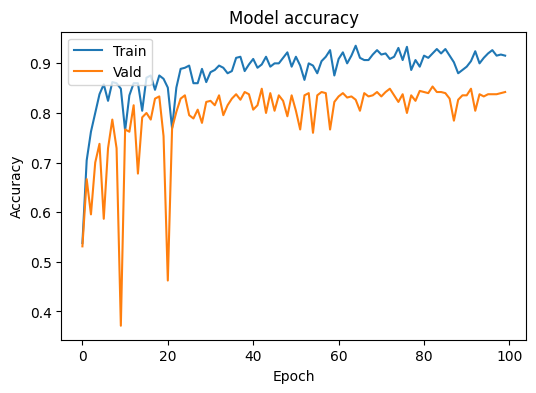

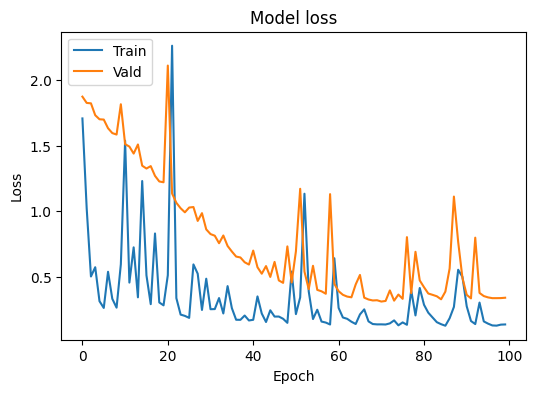

In [8]:
import keras
from keras import layers
from keras.optimizers import SGD




train_acc_list = {}
vald_acc_list = {}





inputs = keras.Input(shape = (Train_X.shape[1], Train_X.shape[2], Train_X.shape[3]))

# LSTM branch
x_lstm = layers.Reshape((Train_X.shape[1], Train_X.shape[2]*Train_X.shape[3]))(inputs)
x_lstm = layers.LSTM(64, return_sequences=True)(x_lstm)
x_lstm = layers.LSTM(128, return_sequences=True)(x_lstm)
x_lstm = layers.LSTM(256, return_sequences=True)(x_lstm)
x_lstm = layers.Dense(1, activation='sigmoid')(x_lstm)
x_lstm = layers.Flatten()(x_lstm)

#CNN branch
for j in range(4):
  x_cnn = layers.Conv2D(filters = 64, kernel_size = (3, 3),strides=(2, 2), activation = "relu") (inputs)
  x_cnn = layers.BatchNormalization()(x_cnn) 
  x_cnn = layers.MaxPooling2D(pool_size=(1, 1))(x_cnn)

x_cnn = layers.Flatten()(x_cnn)

# Concatenate the LSTM and CNN branches
x = layers.concatenate([x_lstm, x_cnn])

x = layers.Dense(256, activation="relu")(x) 

outputs = layers.Dense(Train_Y.shape[1], activation='softmax')(x)
model = keras.Model(inputs, outputs, name="model") 
optimizer = SGD(learning_rate=0.001)  
model.compile(optimizer=optimizer, loss='CategoricalCrossentropy', metrics=['accuracy']) 
model.summary()


history = model.fit(Train_X, Train_Y, epochs=100,batch_size = 64, verbose=2, validation_data=(Vald_X, Vald_Y))

print ('Training   ', model.metrics_names,' = ',model.evaluate(Train_X, Train_Y, verbose=0))
print ('Validation ', model.metrics_names,' = ',model.evaluate(Vald_X, Vald_Y, verbose=0))


# train_acc_list["dense {} layer".format(c)] = model.evaluate(Train_X, Train_Y, verbose=0)
# vald_acc_list["dense {} layer".format(c)] = model.evaluate(Vald_X, Vald_Y, verbose=0)

show_acc_los(history)
          

# import pandas as pd
# from IPython.display import display
# df_train_d_lay = pd.DataFrame(train_acc_list)
# df_train_d_lay['dense_layers'] = ['Loss', 'Accuracy']
# df_train_d_lay.set_index('dense_layers', inplace=True)
# df_vald_d_lay = pd.DataFrame(vald_acc_list)
# df_vald_d_lay['dense_layers'] = ['Loss', 'Accuracy']
# df_vald_d_lay.set_index('dense_layers', inplace=True)

# show_acc_los_total(train_acc_list, vald_acc_list, "dense_layers")
# display(df_train_d_lay)
# display(df_vald_d_lay)

##9- Augmentation 
using Gaussian Noise (5 types)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_11 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_11 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 319872)            0         
                                                                 
 dense_6 (Dense)             (None, 256)               818874

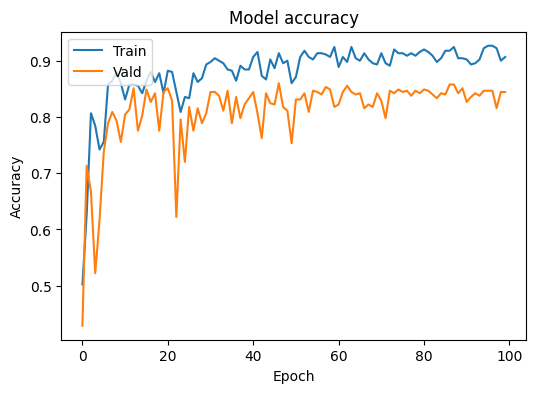

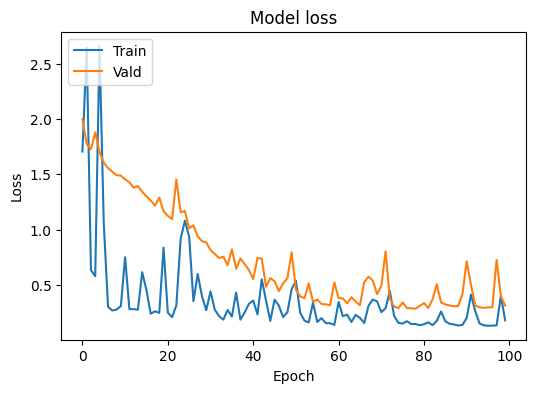

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_15 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_15 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 319872)            0         
                                                                 
 dense_8 (Dense)             (None, 256)               818874

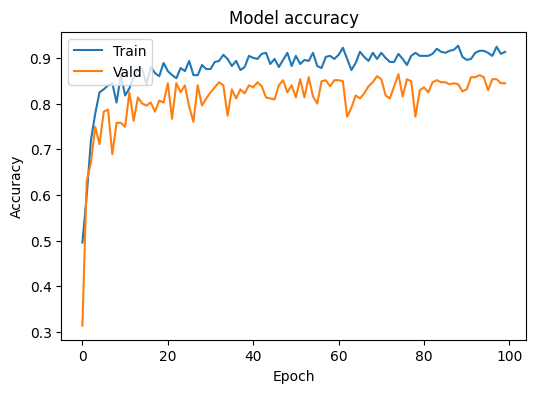

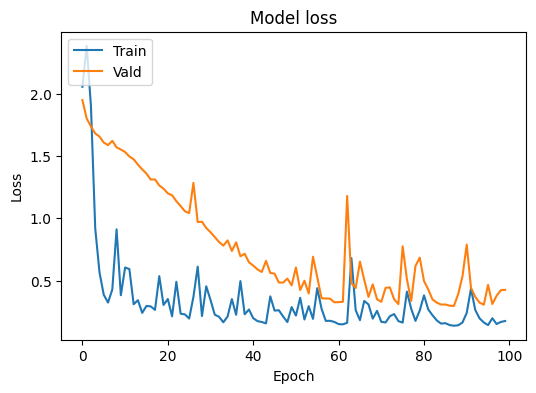

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_19 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_19 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 319872)            0         
                                                                 
 dense_10 (Dense)            (None, 256)               818874

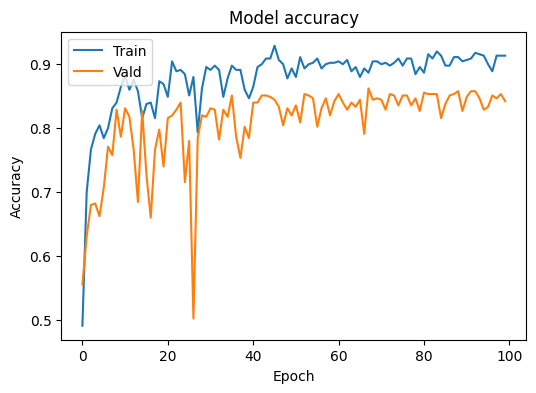

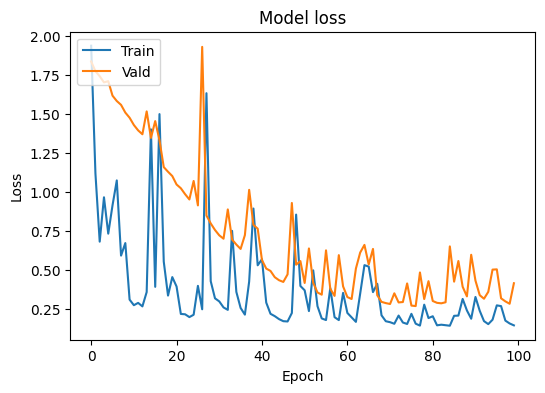

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_23 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_23 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 319872)            0         
                                                                 
 dense_12 (Dense)            (None, 256)               818874

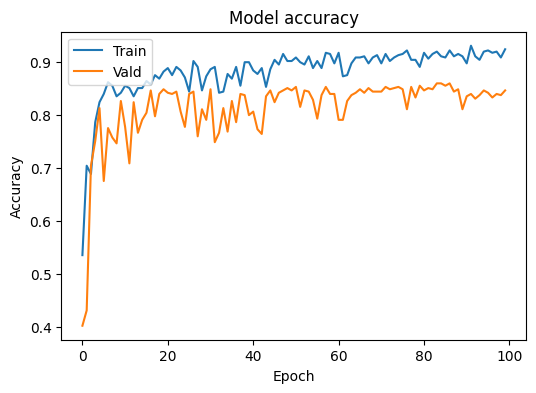

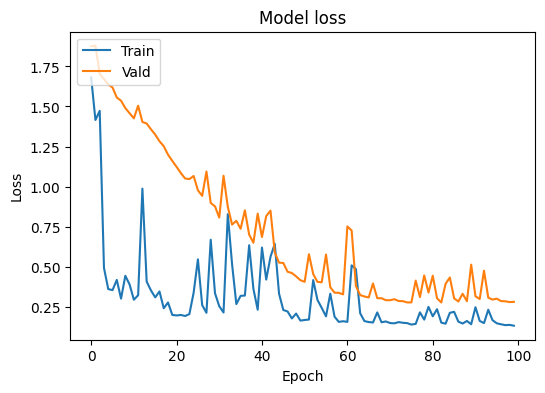

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_27 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_27 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 319872)            0         
                                                                 
 dense_14 (Dense)            (None, 256)               818874

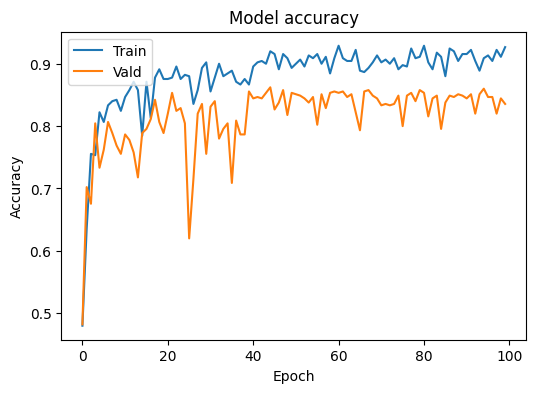

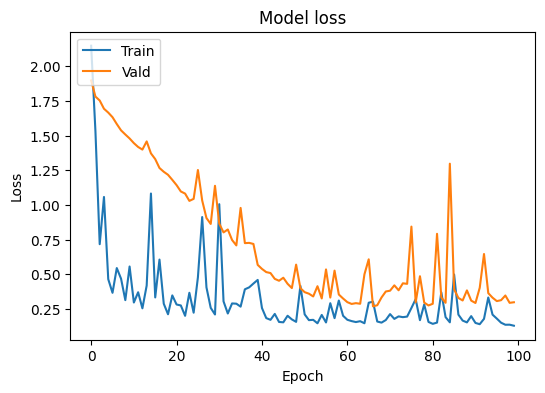

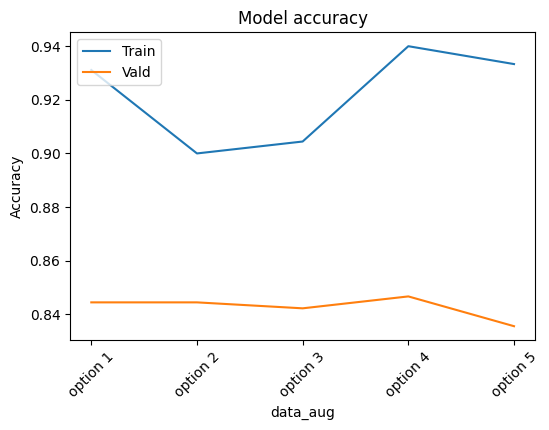

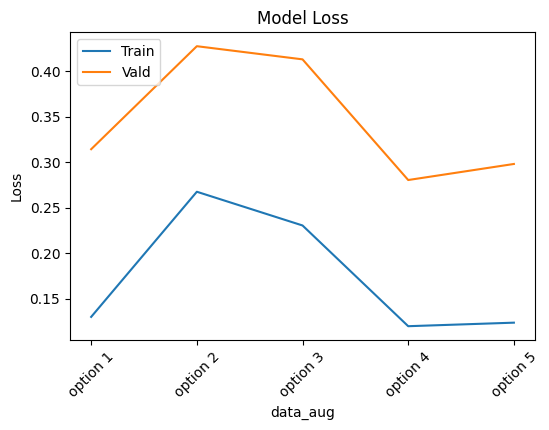

option 1  option 2  option 3  option 4  option 5
data_aug                                                  
Loss      0.130077  0.267638  0.230572  0.119851  0.123738
Accuracy  0.931111  0.900000  0.904444  0.940000  0.933333

option 1  option 2  option 3  option 4  option 5
data_aug                                                  
Loss      0.314404  0.427632  0.413172  0.280532  0.298180
Accuracy  0.844444  0.844444  0.842222  0.846667  0.835556

In [9]:
import keras
from keras import layers
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation settings to try
augmentation_settings = [
    {'width_shift_range': 0.1, 'height_shift_range': 0.1, 'rotation_range': 10, 'zoom_range': 0.1, 'horizontal_flip': True, 'vertical_flip': False},
    {'width_shift_range': 0.2, 'height_shift_range': 0.2, 'rotation_range': 20, 'zoom_range': 0.2, 'horizontal_flip': True, 'vertical_flip': False},
    {'width_shift_range': 0.3, 'height_shift_range': 0.3, 'rotation_range': 30, 'zoom_range': 0.3, 'horizontal_flip': True, 'vertical_flip': False},
    {'width_shift_range': 0.4, 'height_shift_range': 0.4, 'rotation_range': 40, 'zoom_range': 0.4, 'horizontal_flip': True, 'vertical_flip': False},
    {'width_shift_range': 0.5, 'height_shift_range': 0.5, 'rotation_range': 50, 'zoom_range': 0.5, 'horizontal_flip': True, 'vertical_flip': False},
]


train_acc_list = {}
vald_acc_list = {}



c=1
for settings in augmentation_settings:
  datagen = ImageDataGenerator(
    width_shift_range=settings['width_shift_range'],
    height_shift_range=settings['height_shift_range'],
    rotation_range=settings['rotation_range'],
    zoom_range=settings['zoom_range'],
    horizontal_flip=settings['horizontal_flip'],
    vertical_flip=settings['vertical_flip'],
    preprocessing_function=lambda x: x + np.random.normal(loc=0, scale=0.1, size=x.shape)  # add Gaussian noise
    )

  train_generator = datagen.flow(Train_X, Train_Y, batch_size=64)
  inputs = keras.Input(shape = (Train_X.shape[1], Train_X.shape[2], Train_X.shape[3]))
  for j in range(4):
    x = layers.Conv2D(filters = 64, kernel_size = (3, 3),strides=(2, 2), activation = "relu") (inputs)
    x = layers.BatchNormalization()(x) 
    x = layers.MaxPooling2D(pool_size=(1, 1))(x)

  x = layers.Flatten()(x)
  
  x = layers.Dense(256, activation="relu")(x) 

  outputs = layers.Dense(Train_Y.shape[1], activation='softmax')(x)
  model = keras.Model(inputs, outputs, name="model") 
  optimizer = SGD(learning_rate=0.001)  
  model.compile(optimizer=optimizer, loss='CategoricalCrossentropy', metrics=['accuracy']) 
  model.summary()


  history = model.fit(Train_X, Train_Y, epochs=100,batch_size = 64, verbose=2, validation_data=(Vald_X, Vald_Y))
  settings_str = f"WShift:{settings['width_shift_range']}, HShift:{settings['height_shift_range']}, " \
                   f"Rotation:{settings['rotation_range']}, Zoom:{settings['zoom_range']}, " \
                   f"HFlip:{settings['horizontal_flip']}, VFlip:{settings['vertical_flip']}"

  print ('Training   ', model.metrics_names,' = ',model.evaluate(Train_X, Train_Y, verbose=0))
  print ('Validation ', model.metrics_names,' = ',model.evaluate(Vald_X, Vald_Y, verbose=0))


  train_acc_list["option {}".format(c)] = model.evaluate(Train_X, Train_Y, verbose=0)
  vald_acc_list["option {}".format(c)] = model.evaluate(Vald_X, Vald_Y, verbose=0)
  c= c+1

  show_acc_los(history)
          

import pandas as pd
from IPython.display import display
df_train_data_aug = pd.DataFrame(train_acc_list)
df_train_data_aug['data_aug'] = ['Loss', 'Accuracy']
df_train_data_aug.set_index('data_aug', inplace=True)
df_vald_data_aug = pd.DataFrame(vald_acc_list)
df_vald_data_aug['data_aug'] = ['Loss', 'Accuracy']
df_vald_data_aug.set_index('data_aug', inplace=True)

show_acc_los_total(train_acc_list, vald_acc_list, "data_aug")
display(df_train_data_aug)
display(df_vald_data_aug)

##10- Segmenation 

5 levels of segmenation

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_31 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_31 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 319872)            0         
                                                                 
 dense_16 (Dense)            (None, 256)               818874

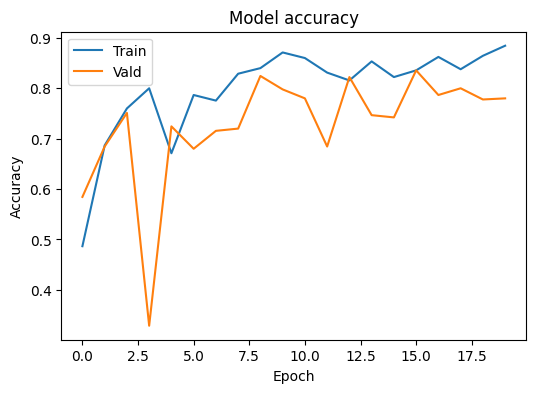

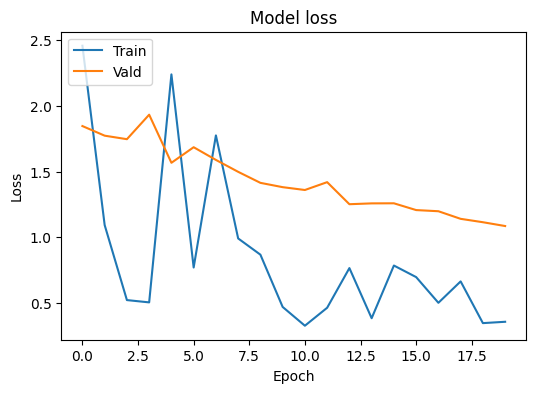

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d_35 (Conv2D)          (None, 2, 2499, 64)       640       
                                                                 
 batch_normalization_35 (Bat  (None, 2, 2499, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 2, 2499, 64)      0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 319872)            0         
                                                                 
 dense_18 (Dense)            (None, 256)               818874

In [ ]:
import keras
from keras import layers
from keras.optimizers import SGD


# Define the segment lengths and overlap values to test
segment_lengths = [1000, 2000, 3000, 4000, 5000]
overlap_values = [500, 1000, 1500, 2000, 2500]

train_acc_list = {}
vald_acc_list = {}



for length in segment_lengths:
    for overlap in overlap_values:
        # Apply segmentation to the input data
        segments = segmenation(Train_X, N=length, delta_N=overlap)
        # Create a new input shape based on the segmented data
        new_input_shape = (segments.shape[1], segments.shape[2], segments.shape[3])

        # Create a new input layer with the new shape
        new_inputs = keras.Input(shape=new_input_shape)

        x = new_inputs

  
        for j in range(4):
          x = layers.Conv2D(filters = 64, kernel_size = (3, 3),strides=(2, 2), activation = "relu") (inputs)
          x = layers.BatchNormalization()(x) 
          x = layers.MaxPooling2D(pool_size=(1, 1))(x)

        x = layers.Flatten()(x)
        
        x = layers.Dense(256, activation="relu")(x) 

        outputs = layers.Dense(Train_Y.shape[1], activation='softmax')(x)
        model = keras.Model(inputs, outputs, name="model") 
        optimizer = SGD(learning_rate=0.001)  
        model.compile(optimizer=optimizer, loss='CategoricalCrossentropy', metrics=['accuracy']) 
        model.summary()


        history = model.fit(Train_X, Train_Y, epochs=20,batch_size = 64, verbose=2, validation_data=(Vald_X, Vald_Y))

        print ('Training   ', model.metrics_names,' = ',model.evaluate(Train_X, Train_Y, verbose=0))
        print ('Validation ', model.metrics_names,' = ',model.evaluate(Vald_X, Vald_Y, verbose=0))

        key = "Length: {}, Overlap: {}".format(length, overlap)
        train_acc_list[key] = model.evaluate(Train_X, Train_Y, verbose=0)
        vald_acc_list[key] = model.evaluate(Vald_X, Vald_Y, verbose=0)

        show_acc_los(history)
                

import pandas as pd
from IPython.display import display
df_train_seg = pd.DataFrame(train_acc_list)
df_train_seg['seg'] = ['Loss', 'Accuracy']
df_train_seg.set_index('seg', inplace=True)
df_vald_seg = pd.DataFrame(vald_acc_list)
df_vald_seg['seg'] = ['Loss', 'Accuracy']
df_vald_seg.set_index('seg', inplace=True)

show_acc_los_total(train_acc_list, vald_acc_list, "seg")
display(df_train_seg)
display(df_vald_d_seg)

##11- Duplicate (lazy training)
5 steps

##12- CNN 1D + segmenation + Voting